ID: CHEMBL249

Type: SINGLE PROTEIN

Preferred Name: Neurokinin 1 receptor

IC50

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt


from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Draw
from rdkit.Chem import Lipinski


from rdkit.Chem.Scaffolds import MurckoScaffold

from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import model_selection as ms


import re

In [2]:
from rdkit import RDLogger                                                                                                                                                               
RDLogger.DisableLog('rdApp.*')

In [3]:
df = pd.read_csv('compound_set.tsv', sep='\t')

In [4]:
with open('compound_set.tsv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter="\t")
    ligand_set = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

In [5]:
len(np.where(df['pChEMBL Value'].isna() == True)[0])

1022

In [6]:
len(np.where(df['pChEMBL Value'].isna() == False)[0])

2128

In [7]:
len(ligand_set)

3150

Zobrazeni chemical space

In [8]:
nk_rings = [len(Chem.GetSSSR(l)) for l in ligand_set]
nk_rotatable = [Chem.CalcNumRotatableBonds(l) for l in ligand_set]
nk_atomcount = [l.GetNumHeavyAtoms() for l in ligand_set]
nk_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in ligand_set]
nk_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in ligand_set]
nk_molwt = [rdescriptors.CalcExactMolWt(l) for l in ligand_set]
nk_tpsa = [rdescriptors.CalcTPSA(l) for l in ligand_set]
nk_logp = [Descriptors.MolLogP(l) for l in ligand_set]

In [9]:
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
df = pd.DataFrame(data={'set':'nk1r', 'rings': nk_rings,
                        'rotatable': nk_rotatable, 'atoms': nk_atomcount,
                        'hba': nk_hba, 'hbd': nk_hbd, 'molwt': nk_molwt,
                        'tpsa': nk_tpsa, 'logp': nk_logp, "rdmol": ligand_set})
df


set  rings  rotatable  atoms  hba  hbd       molwt   tpsa     logp  \
0     nk1r      3          8     31    6    2  445.133729  75.72  4.28500   
1     nk1r      4          6     35    6    2  500.164695  74.01  5.05810   
2     nk1r      4          6     31    4    1  413.246713  45.23  4.70414   
3     nk1r      3         11     37    8    1  508.304956  84.40  5.81790   
4     nk1r      5          6     34    4    1  469.192090  45.23  5.89390   
...    ...    ...        ...    ...  ...  ...         ...    ...      ...   
3145  nk1r      3          3     24    6    3  365.060090  92.50  2.08340   
3146  nk1r      3          6     30    6    3  414.195486  87.66  3.95740   
3147  nk1r      4          6     37    7    2  534.150188  83.24  4.95210   
3148  nk1r      4          6     37    7    2  534.150188  83.24  4.95210   
3149  nk1r      4          6     37    7    2  534.150188  83.24  4.95210   

                                                  rdmol  
0     <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
1     <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
2     <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
3     <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
4     <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
...                                                 ...  
3145  <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
3146  <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
3147  <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
3148  <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
3149  <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  

[3150 rows x 10 columns]

<Axes: >

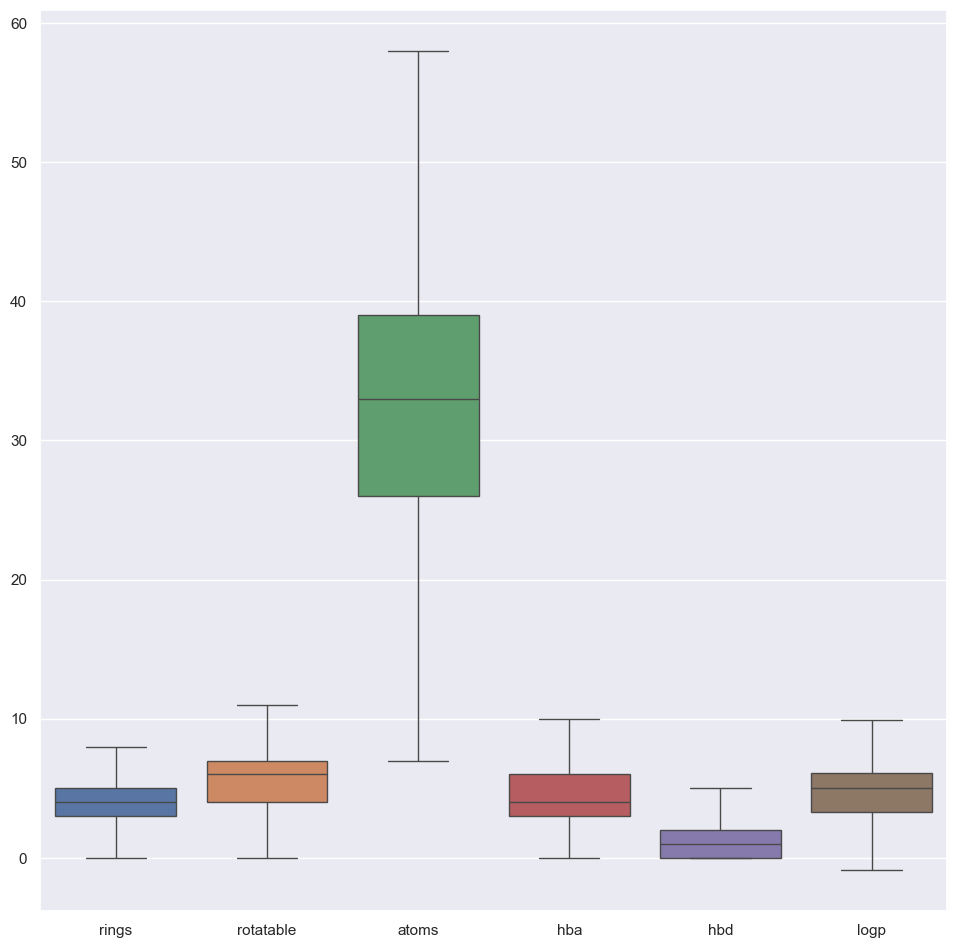

In [10]:
sns.boxplot(data=df[['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp']], showfliers=False)

<Axes: >

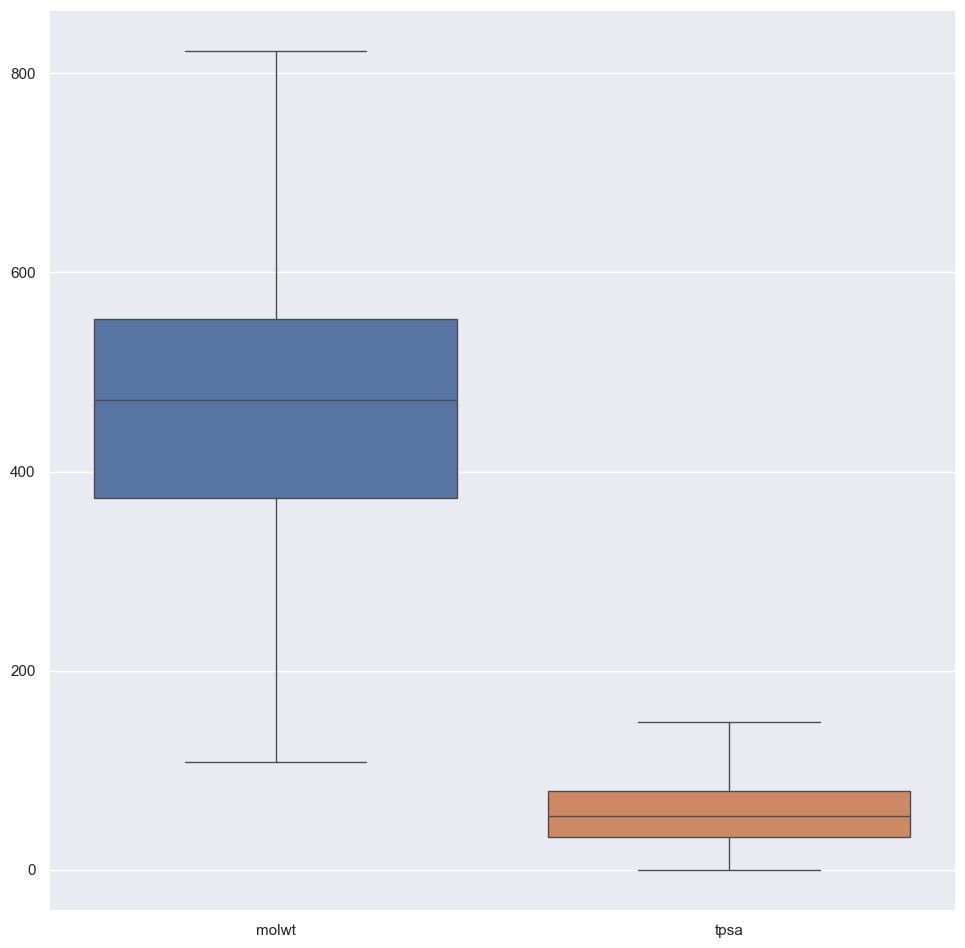

In [11]:
sns.boxplot(data=df[['molwt', 'tpsa']], showfliers = False)

In [12]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
len(drugs)

7120

In [13]:
drugbank_rings = [len(Chem.GetSSSR(l)) for l in drugs]
drugbank_rotatable = [Chem.CalcNumRotatableBonds(l) for l in drugs]
drugbank_atomcount = [l.GetNumHeavyAtoms() for l in drugs]
drugbank_hba = [rdescriptors.CalcNumLipinskiHBA(l) for l in drugs]
drugbank_hbd = [rdescriptors.CalcNumLipinskiHBD(l) for l in drugs]
drugbank_molwt = [rdescriptors.CalcExactMolWt(l) for l in drugs]
drugbank_tpsa = [rdescriptors.CalcTPSA(l) for l in drugs]
drugbank_logp = [Descriptors.MolLogP(l) for l in drugs]

In [14]:
df_drugbank = pd.DataFrame(data={'set':'drugs', 'rings': drugbank_rings,
                                 'rotatable': drugbank_rotatable, 'atoms': drugbank_atomcount,
                                 'hba': drugbank_hba, 'hbd': drugbank_hbd, 'molwt': drugbank_molwt,
                                 'tpsa': drugbank_tpsa, 'logp': drugbank_logp, "rdmol": drugs})
df_drugbank

set  rings  rotatable  atoms  hba  hbd        molwt    tpsa     logp  \
0     drugs      6         66    155   57   31  2178.985813  901.57 -8.11643   
1     drugs      6         31     91   32   20  1268.641439  495.89 -3.10570   
2     drugs      4         19     74   26   18  1068.426955  435.41 -4.13203   
3     drugs      6         38    102   31   20  1429.669818  495.67 -0.50613   
4     drugs      1         15     85   23    5  1201.841368  278.80  3.26900   
...     ...    ...        ...    ...  ...  ...          ...     ...      ...   
7115  drugs      1          0      8    1    1   128.002892   20.23  2.04560   
7116  drugs      3          3     24    9    5   340.079432  149.82 -1.32270   
7117  drugs      6         14     79   27   13  1114.554641  403.10  1.54710   
7118  drugs      0         13     21    5    0   330.147689   83.50 -0.00030   
7119  drugs      4          2     28    4    1   408.150365   71.44  3.35040   

                                                  rdmol  
0     <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
1     <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
2     <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
3     <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
4     <rdkit.Chem.rdchem.Mol object at 0x000001B50EF...  
...                                                 ...  
7115  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
7116  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
7117  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
7118  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
7119  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  

[7120 rows x 10 columns]

In [15]:
joint_df = pd.concat([df, df_drugbank], ignore_index=True)
joint_df

set  rings  rotatable  atoms  hba  hbd        molwt    tpsa     logp  \
0       nk1r      3          8     31    6    2   445.133729   75.72  4.28500   
1       nk1r      4          6     35    6    2   500.164695   74.01  5.05810   
2       nk1r      4          6     31    4    1   413.246713   45.23  4.70414   
3       nk1r      3         11     37    8    1   508.304956   84.40  5.81790   
4       nk1r      5          6     34    4    1   469.192090   45.23  5.89390   
...      ...    ...        ...    ...  ...  ...          ...     ...      ...   
10265  drugs      1          0      8    1    1   128.002892   20.23  2.04560   
10266  drugs      3          3     24    9    5   340.079432  149.82 -1.32270   
10267  drugs      6         14     79   27   13  1114.554641  403.10  1.54710   
10268  drugs      0         13     21    5    0   330.147689   83.50 -0.00030   
10269  drugs      4          2     28    4    1   408.150365   71.44  3.35040   

                                                   rdmol  
0      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
1      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
2      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
3      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
4      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
...                                                  ...  
10265  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10266  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10267  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10268  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10269  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  

[10270 rows x 10 columns]

In [16]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['rings', 'rotatable', 'atoms', 'hba', 'hbd', 'logp'])
melted_df

set variable   value
0       nk1r    rings  3.0000
1       nk1r    rings  4.0000
2       nk1r    rings  4.0000
3       nk1r    rings  3.0000
4       nk1r    rings  5.0000
...      ...      ...     ...
61615  drugs     logp  2.0456
61616  drugs     logp -1.3227
61617  drugs     logp  1.5471
61618  drugs     logp -0.0003
61619  drugs     logp  3.3504

[61620 rows x 3 columns]

Neurokinin receptor 1 vs drug bank 

<Axes: xlabel='variable', ylabel='value'>

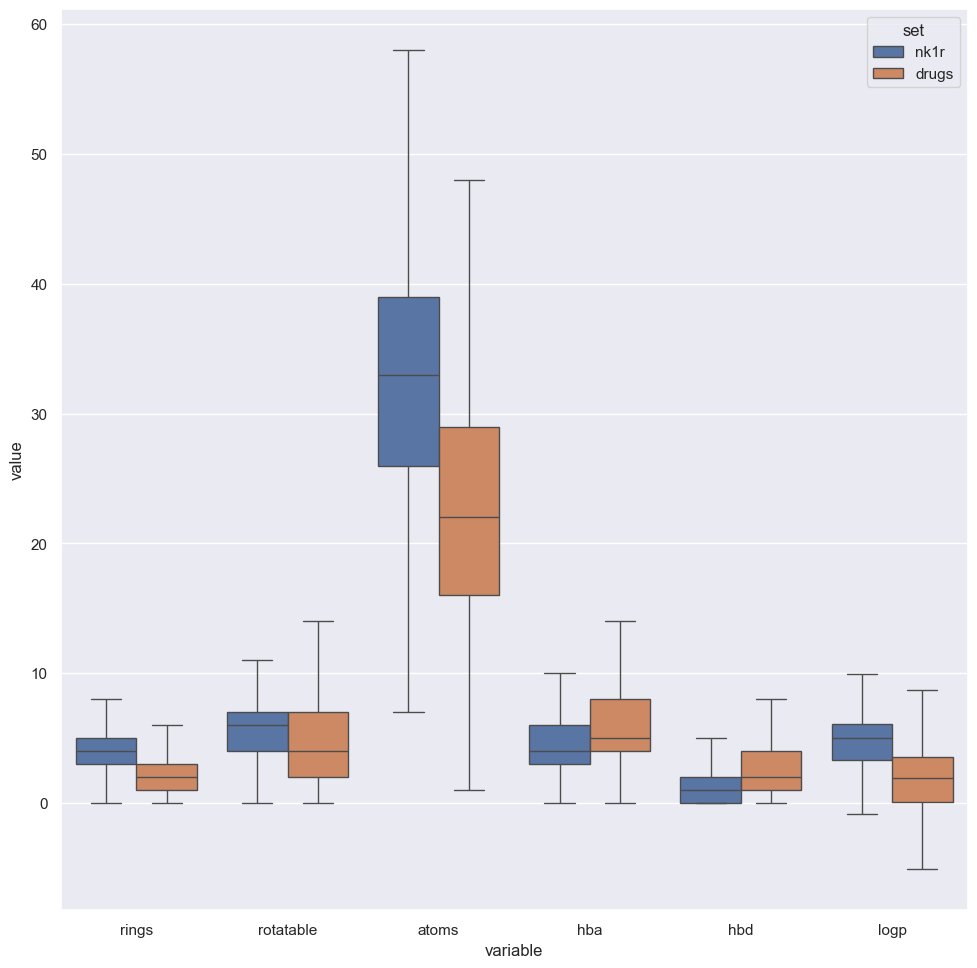

In [17]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df, showfliers=False)

In [18]:
melted_df2 = pd.melt(joint_df, id_vars=['set'], value_vars=['molwt', 'tpsa'])
melted_df2

set variable       value
0       nk1r    molwt  445.133729
1       nk1r    molwt  500.164695
2       nk1r    molwt  413.246713
3       nk1r    molwt  508.304956
4       nk1r    molwt  469.192090
...      ...      ...         ...
20535  drugs     tpsa   20.230000
20536  drugs     tpsa  149.820000
20537  drugs     tpsa  403.100000
20538  drugs     tpsa   83.500000
20539  drugs     tpsa   71.440000

[20540 rows x 3 columns]

<Axes: xlabel='variable', ylabel='value'>

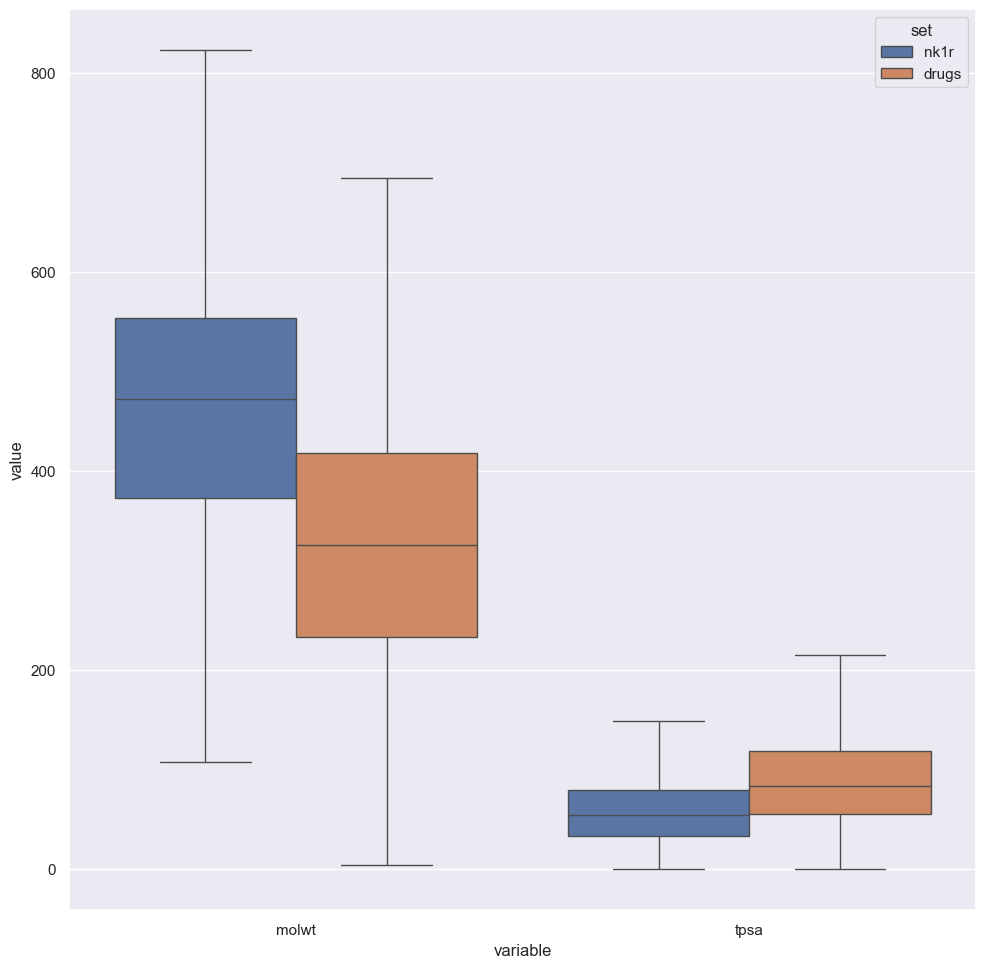

In [19]:
sns.boxplot(y='value', x='variable', hue='set', data=melted_df2, showfliers=False)

Scaffolds

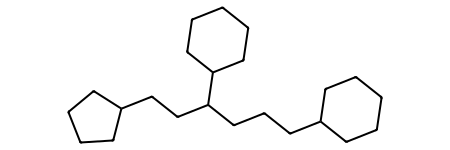

In [20]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
scaffold(ligand_set[0])

In [21]:
ligand_scaffolds = [scaffold(drug) for drug in ligand_set]
drugbank_scaffolds = [scaffold(drug) for drug in drugs]

ligand_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(ligand_set) if mol]
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]


In [22]:
scaffolds2ligands = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in ligand_scaffolds_smiles}
for drug_idx, scaffoldsmiles in ligand_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(drug_idx)

scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)

In [23]:
scaffold_ligcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2ligands.items()]
len(scaffold_ligcount), scaffold_ligcount[:2]


(2453,
 [('FC(F)(F)c1cc(COCC(NCc2nn[nH]n2)c2ccccc2)cc(C(F)(F)F)c1', 1),
  ('O=c1[nH]nc(CN2CCCC(OCc3cc(C(F)(F)F)cc(C(F)(F)F)c3)C2c2ccccc2)[nH]1', 4)])

In [24]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:2]

(1547,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2)])

In [25]:
scaffold_ligcount.sort(key=lambda x: x[1], reverse=True)
scaffold_ligcount[:5]

[('', 33),
 ('COc1ccccc1CNC1C2CCN(CC2)C1C(c1ccccc1)c1ccccc1', 32),
 ('FC(F)(F)c1cc(COC2C3CCN(CC3)C2C(c2ccccc2)c2ccccc2)cc(C(F)(F)F)c1', 18),
 ('CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)OCc1cc(C(F)(F)F)cc(C(F)(F)F)c1', 16),
 ('COc1ccccc1CNC1CCCNC1c1ccccc1', 14)]

In [26]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:5]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182)]

We can see that there arent any too common scaffolds, but the distribution is simmilar as there is one common scaffold and then there are some unique ones

In [27]:
y1 = [v[1] for v in scaffold_ligcount]
y2 = [v[1] for v in scaffold_drugcount]
x1 = np.arange(0, len(y1), 1)
x2 = np.arange(0, len(y2), 1)

In [28]:
import matplotlib 

In [29]:
sns.set(rc={'figure.figsize':(11.7, 11.7)}, style="white", palette=None) # for bigger graphs

Text(0.5, 1.0, 'counts nk1r')

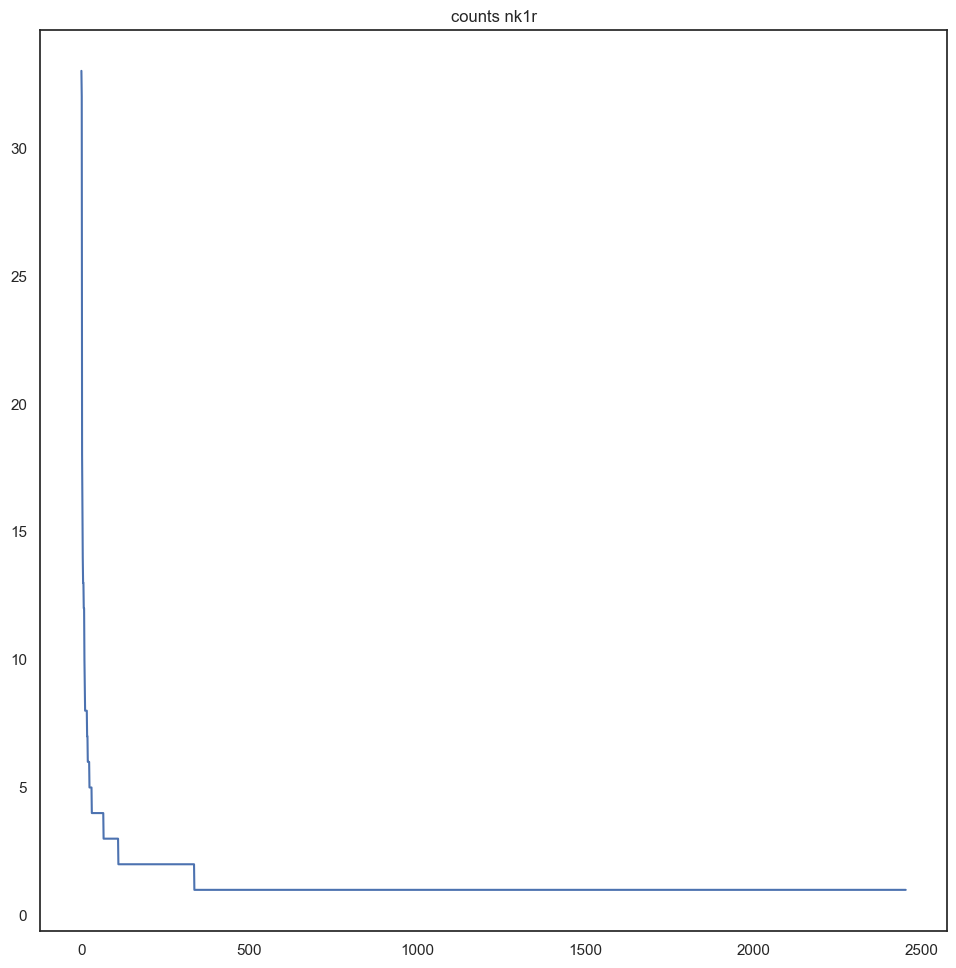

In [30]:
plt.plot(x1, y1)
plt.title('counts nk1r')

Text(0.5, 1.0, 'counts drugbank')

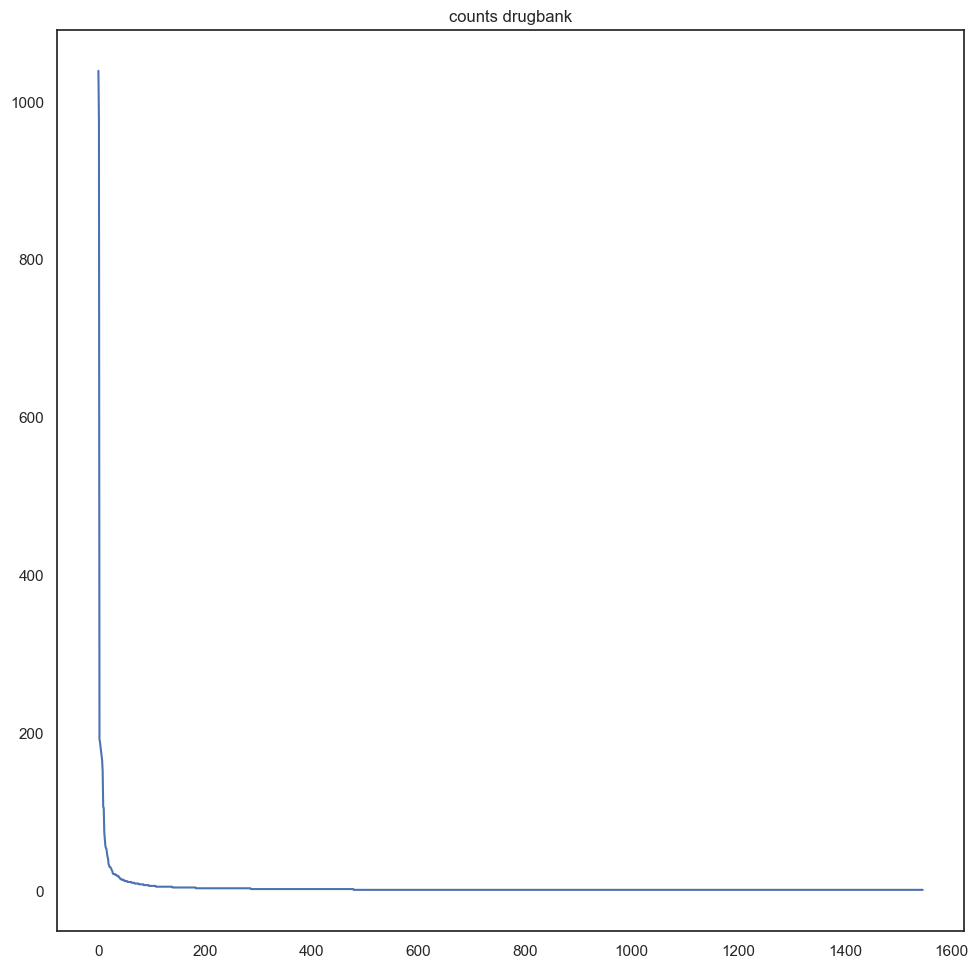

In [31]:
plt.plot(x2, y2)
plt.title('counts drugbank')

In [32]:
joint_df

set  rings  rotatable  atoms  hba  hbd        molwt    tpsa     logp  \
0       nk1r      3          8     31    6    2   445.133729   75.72  4.28500   
1       nk1r      4          6     35    6    2   500.164695   74.01  5.05810   
2       nk1r      4          6     31    4    1   413.246713   45.23  4.70414   
3       nk1r      3         11     37    8    1   508.304956   84.40  5.81790   
4       nk1r      5          6     34    4    1   469.192090   45.23  5.89390   
...      ...    ...        ...    ...  ...  ...          ...     ...      ...   
10265  drugs      1          0      8    1    1   128.002892   20.23  2.04560   
10266  drugs      3          3     24    9    5   340.079432  149.82 -1.32270   
10267  drugs      6         14     79   27   13  1114.554641  403.10  1.54710   
10268  drugs      0         13     21    5    0   330.147689   83.50 -0.00030   
10269  drugs      4          2     28    4    1   408.150365   71.44  3.35040   

                                                   rdmol  
0      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
1      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
2      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
3      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
4      <rdkit.Chem.rdchem.Mol object at 0x000001B50CF...  
...                                                  ...  
10265  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10266  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10267  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10268  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  
10269  <rdkit.Chem.rdchem.Mol object at 0x000001B5150...  

[10270 rows x 10 columns]

VISUALIZATIONS

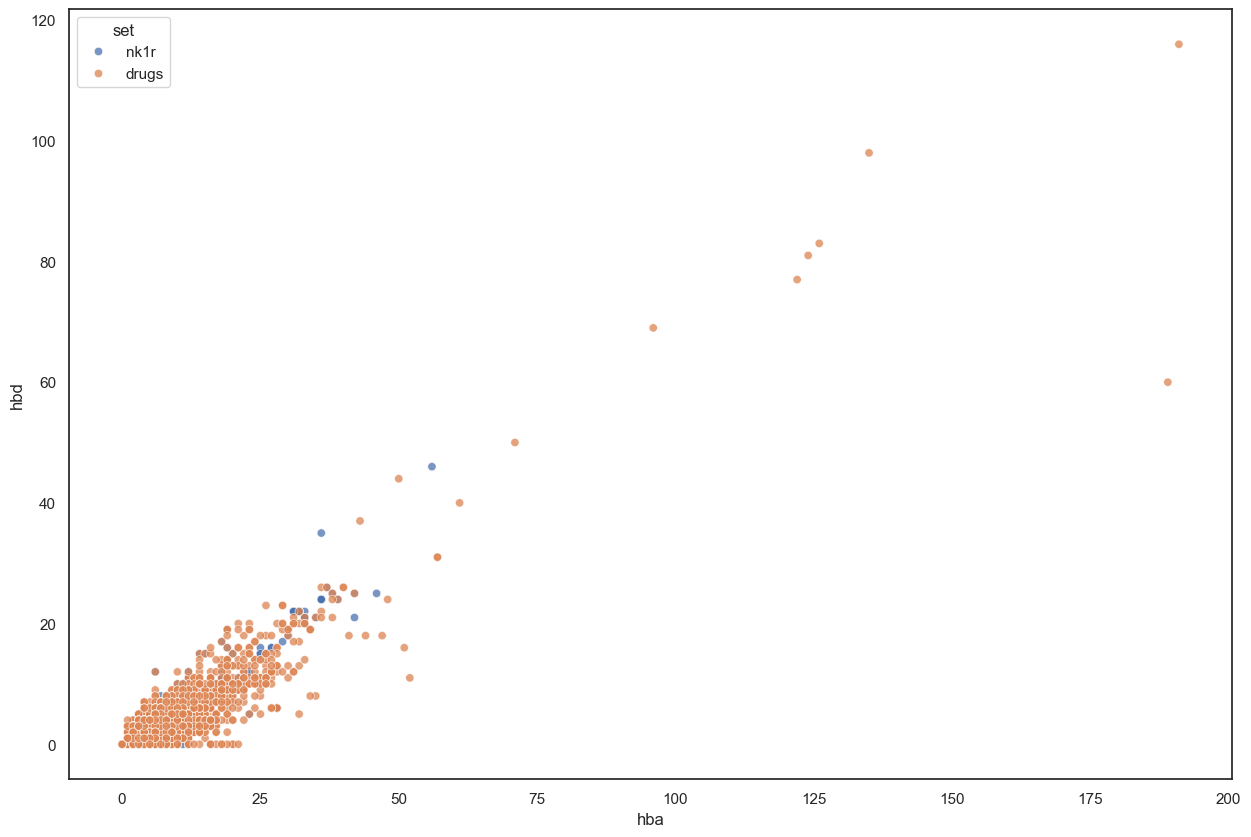

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="hba",
                      y="hbd",
                      data=joint_df,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [34]:
joint_df = joint_df.join(pd.DataFrame((rdescriptors.MQNs_(mol) for mol in joint_df["rdmol"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

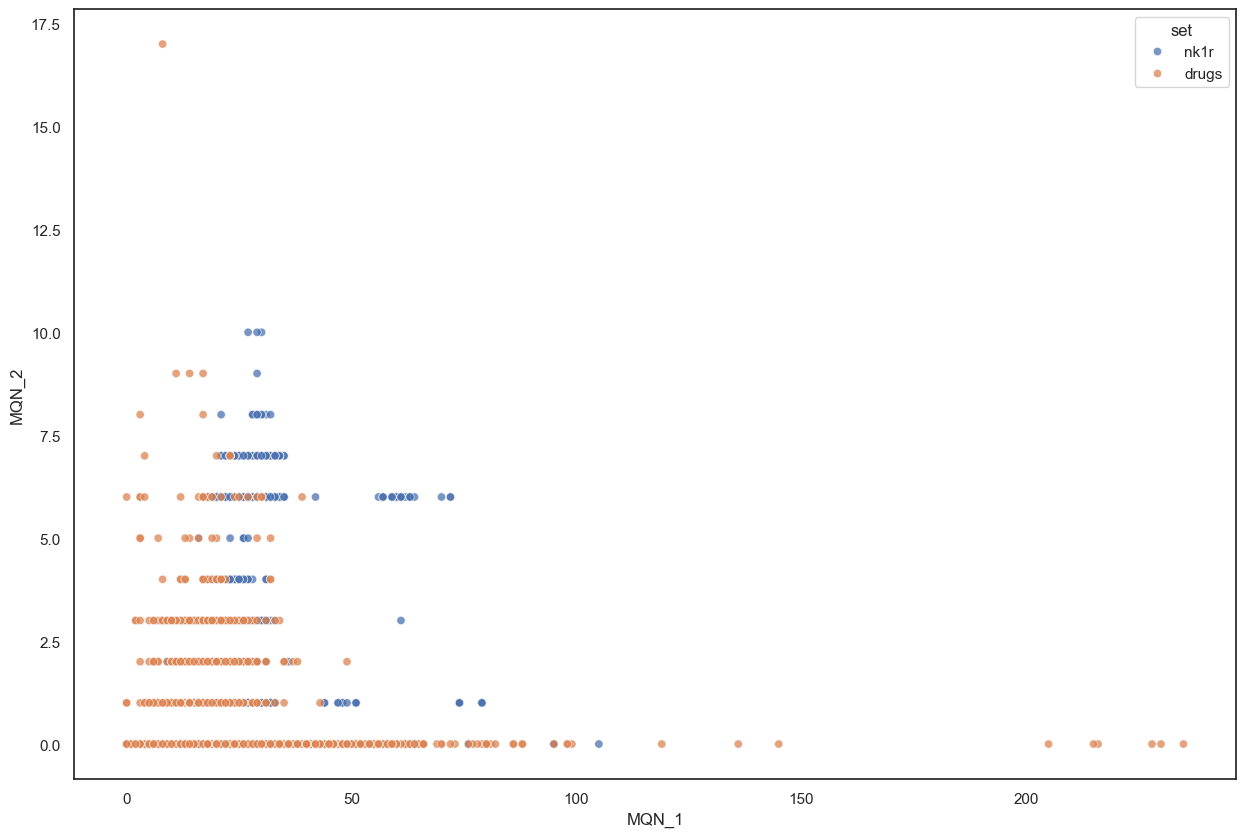

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="MQN_1",
                      y="MQN_2",
                      data=joint_df,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [36]:
pca = decomposition.PCA(n_components=42)
norm = preprocessing.normalize(joint_df[(f"MQN_{x}" for x in range(1, 43))])
pca.fit(norm)
joint_df = joint_df.join(pd.DataFrame(pca.transform(norm), columns=[f"nPCA_{x}" for x in range(1, 43)]))

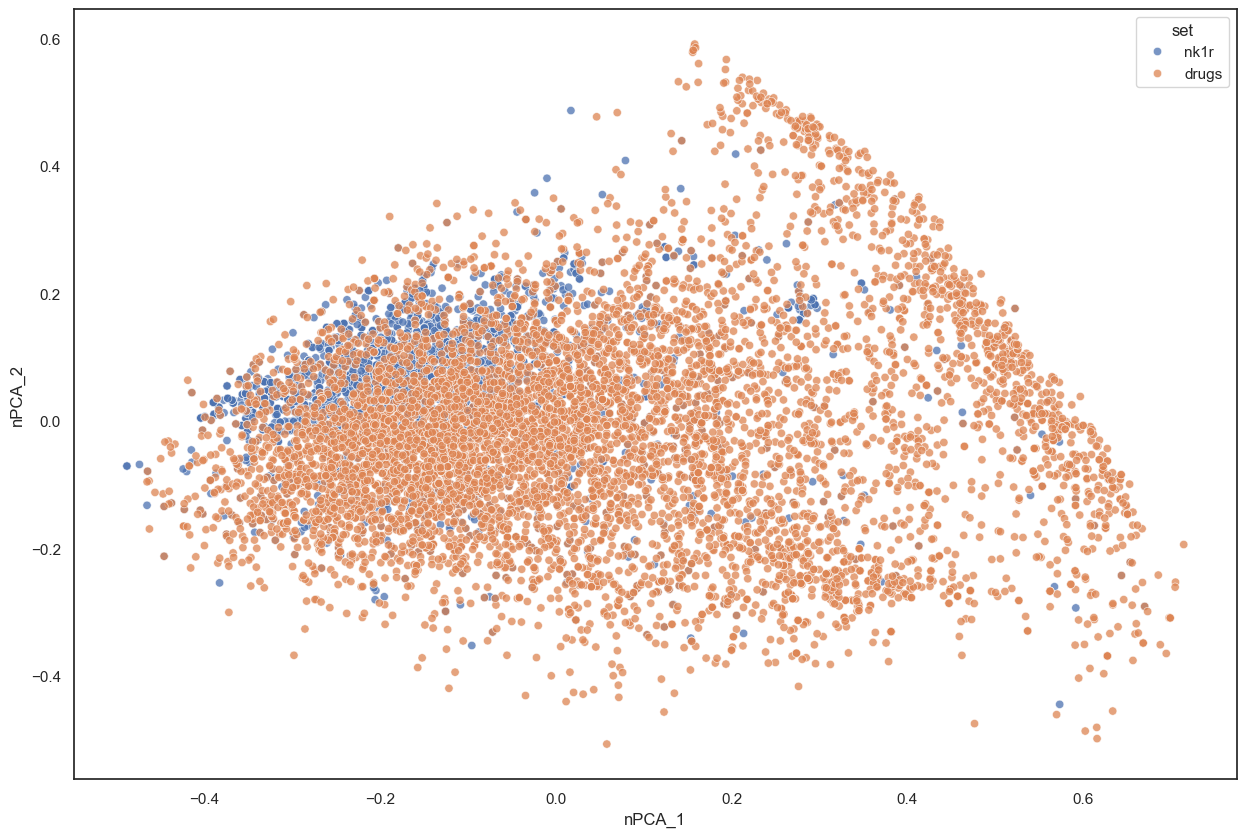

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="nPCA_1",
                      y="nPCA_2",
                      data=joint_df,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [38]:
# joint_df = joint_df.join(pd.DataFrame(pca.transform(norm), columns=[f"nPCA_{x}" for x in range(1, 43)]))

In [39]:
fpss = [Chem.GetMorganFingerprintAsBitVect(m,2,nBits=1024) for m in joint_df["rdmol"]]
joint_df = joint_df.join(pd.DataFrame(fpss, columns=["fps"]))


In [40]:
sparse_mat = distance.pdist(list(joint_df["fps"]),metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

In [41]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)
joint_df = joint_df.join(pd.DataFrame(X_mds, columns=["mds_x","mds_y"]))

C:\Users\gkarg\strojuc_1\__venv__\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="mds_x",
                      y="mds_y",
                      data=joint_df,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [ ]:
clf = manifold.TSNE(n_components=2, metric="precomputed", init="random")
X_tsne = clf.fit_transform(dist_mat)
joint_df = joint_df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"]))

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="tsne_x",
                      y="tsne_y",
                      data=joint_df,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [ ]:
import umap
reducer = umap.UMAP(metric="precomputed")
embedding = reducer.fit_transform(dist_mat)

In [ ]:
joint_df = joint_df.join(pd.DataFrame(embedding, columns=["umap_x", "umap_y"]))

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="umap_x",
                      y="umap_y",
                      data=joint_df,
                      hue="set",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

MODEL stuff

In [42]:
from rdkit.Chem.SaltRemover import SaltRemover
sr = SaltRemover() # from rdkit
m = Chem.MolFromSmiles("[Na+].C(=O)[O-]")
print(Chem.MolToSmiles(sr(m)))

O=C[O-]


In [43]:
""" contribution from Hans de Winter """
def _InitialiseNeutralisationReactions():
    patts= (
        # Imidazoles
        ('[n+;H]','n'),
        # Amines
        ('[N+;!H0]','N'),
        # Carboxylic acids and alcohols
        ('[$([O-]);!$([O-][#7])]','O'),
        # Thiols
        ('[S-;X1]','S'),
        # Sulfonamides
        ('[$([N-;X2]S(=O)=O)]','N'),
        # Enamines
        ('[$([N-;X2][C,N]=C)]','N'),
        # Tetrazoles
        ('[n-]','[nH]'),
        # Sulfoxides
        ('[$([S-]=O)]','S'),
        # Amides
        ('[$([N-]C=O)]','N'),
        )
    return [(Chem.MolFromSmarts(x),Chem.MolFromSmiles(y,False)) for x,y in patts]

_reactions=None
def NeutraliseCharges(mol, reactions=None):
    global _reactions
    if reactions is None:
        if _reactions is None:
            _reactions=_InitialiseNeutralisationReactions()
        reactions=_reactions
    replaced = False
    for i,(reactant, product) in enumerate(reactions):
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = Chem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    return mol, replaced

In [44]:
smis=("c1cccc[nH+]1",
      "C[N+](C)(C)C","c1ccccc1[NH3+]",
      "CC(=O)[O-]","c1ccccc1[O-]",
      "CCS",
      "C[N-]S(=O)(=O)C",
      "C[N-]C=C","C[N-]N=C",
      "c1ccc[n-]1",
      "CC[N-]C(=O)CC")
for smi in smis:
    (molSmiles, neutralised) = NeutraliseCharges(Chem.MolFromSmiles(smi))
    print(smi + "->" + Chem.MolToSmiles(molSmiles))

c1cccc[nH+]1->c1ccncc1
C[N+](C)(C)C->C[N+](C)(C)C
c1ccccc1[NH3+]->Nc1ccccc1
CC(=O)[O-]->CC(=O)O
c1ccccc1[O-]->Oc1ccccc1
CCS->CCS
C[N-]S(=O)(=O)C->CNS(C)(=O)=O
C[N-]C=C->C=CNC
C[N-]N=C->C=NNC
c1ccc[n-]1->c1cc[nH]c1
CC[N-]C(=O)CC->CCNC(=O)CC


In [45]:
_saltRemover = SaltRemover()
_inorganicPatt = Chem.MolFromSmarts("[!#6;!#7;!#8;!#16;!F;!Cl;!Br;!I]") # to remove compounds with unwanted atom types
_carbonPatt = Chem.MolFromSmarts("[#6]") # to remove compounds without carbon - inorganic
def standardize(mol):
    if mol.HasSubstructMatch(_carbonPatt):
        mol = _saltRemover(mol)
        if mol.GetNumAtoms()==0:
            return None
        else:
            mol, neutralized = NeutraliseCharges(mol)
            if mol.HasSubstructMatch(_inorganicPatt):
                return None
            else:
                # Sanitize mol, without sanitization some structures can't be drawn or fingerprinted
                Chem.SanitizeMol(mol) # add catch block?
                return mol
    else:
        return None

In [46]:
# some pChEMBL values in our file are not valid floats
float_pattern = re.compile("[0-9]+(\.[0-9]*)?")
# function for Lipinski's descriptors
lip_func = [("HBA", Lipinski.NumHAcceptors), ("HBD", Lipinski.NumHDonors), ("MW", Descriptors.ExactMolWt),
            ("LogP", Descriptors.MolLogP), ("TPSA", rdescriptors.CalcTPSA), ("RB", Lipinski.NumRotatableBonds)]
# load mtor, we want to remember source of data and Standard and pChEMBLE value (it's transfomed compound activity to "standard" value)
with open("compound_set.tsv") as inp:
    lg = [row for row in csv.DictReader(inp, delimiter="\t")]
    for m in lg:
        mol = Chem.MolFromSmiles(m["Smiles"])
        if mol:
            m["rdmol"] = mol
            stdmol = standardize(mol)
            m["source"] = "nk1r"
            m["pChEMBL Value"] = float(m["pChEMBL Value"]) if float_pattern.match(m["pChEMBL Value"]) else 0
            m["std_rdmol"] = None
            m["Standard Value"] = float(m["Standard Value"]) if float_pattern.match(m["Standard Value"]) else np.NaN
        if stdmol:
            m["std_rdmol"] = stdmol
            m["std_smiles"] = Chem.MolToSmiles(stdmol)
            m["fps"] = Chem.GetMorganFingerprintAsBitVect(m["std_rdmol"],2,nBits=1024)
            for f in lip_func:
                m[f[0]] = f[1](m["std_rdmol"])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\1784745091.py:2: SyntaxWarning: invalid escape sequence '\.'
  float_pattern = re.compile("[0-9]+(\.[0-9]*)?")


In [47]:
%%capture
# %%capture hides stderr (and maybe all output)
# same for drugbank
drugbank = []
for m in Chem.SDMolSupplier("../data/drugbank.sdf"):
    if m:
        stdmol = standardize(m)
    else:
        continue    
    if stdmol:
        std_smiles = Chem.MolToSmiles(stdmol)
        drugbank.append({
         "rdmol": m,
         "std_rdmol": stdmol,
         "source": "drugbank",
         "std_smiles": std_smiles,
         "Smiles": Chem.MolToSmiles(m),
         "pChEMBL Value": 0,
         "Standard Value": np.NaN,
         "fps": Chem.GetMorganFingerprintAsBitVect(stdmol, 2, nBits=1024),
         **{f[0]: f[1](stdmol) for f in lip_func}
        })


In [48]:
# let's work with Pandas dataframe
df = pd.DataFrame((*drugbank, *[m for m in lg if m["std_rdmol"]]), columns=["Smiles", "std_smiles", "source", "rdmol", "std_rdmol", "fps", "Standard Value", "pChEMBL Value", *(f[0] for f in lip_func)])
# adds index as normal column
df.reset_index(level=0, inplace=True)
df = df.join(pd.DataFrame((rdescriptors.MQNs_(mol) for mol in df["std_rdmol"]),
                          columns=[*(f"MQN_{x}" for x in range(1,43))])
            )

In [49]:
df['pChEMBL Value'].isnull().any()

False

In [50]:
def get_results(model, data, descriptors, predicted_value):
    res = pd.DataFrame(model.predict(data[descriptors])).join(data[[predicted_value, "source"]].reset_index(level=None,drop=True))
    res.columns = ["Prediction", predicted_value, "Source"]
    print(f"""Average error whole set: {(res["Prediction"]-res[predicted_value]).abs().mean()}
Average error nk1r: {(res[res["Source"]=="nk1r"]["Prediction"]-res[res["Source"]=="nk1r"][predicted_value]).abs().mean()}""")
    return res

In [51]:
rf = ensemble.RandomForestRegressor()
rf.fit(df[df["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], df[df["pChEMBL Value"]>0]["pChEMBL Value"])

RandomForestRegressor()

In [52]:
res_svr_p = get_results(rf, df, (f"MQN_{x}" for x in range(1, 43)), "pChEMBL Value")

Average error whole set: 5.458747505630769
Average error nk1r: 2.4505139437767802


In [53]:
trainset, testset = ms.train_test_split(df[df["pChEMBL Value"]>0])

In [54]:
from sklearn.kernel_ridge import KernelRidge

In [55]:

kr = KernelRidge(alpha=0.01, kernel='rbf', gamma = 0.0004)
kr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

KernelRidge(alpha=0.01, gamma=0.0004, kernel='rbf')

In [56]:
res_svr_p = get_results(kr, trainset, (f"MQN_{x}" for x in range(1, 43)), "pChEMBL Value")

Average error whole set: 0.7219190680610988
Average error nk1r: 0.7219190680610988


In [57]:
ress = get_results(kr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')

Average error whole set: 0.766658751147849
Average error nk1r: 0.766658751147849


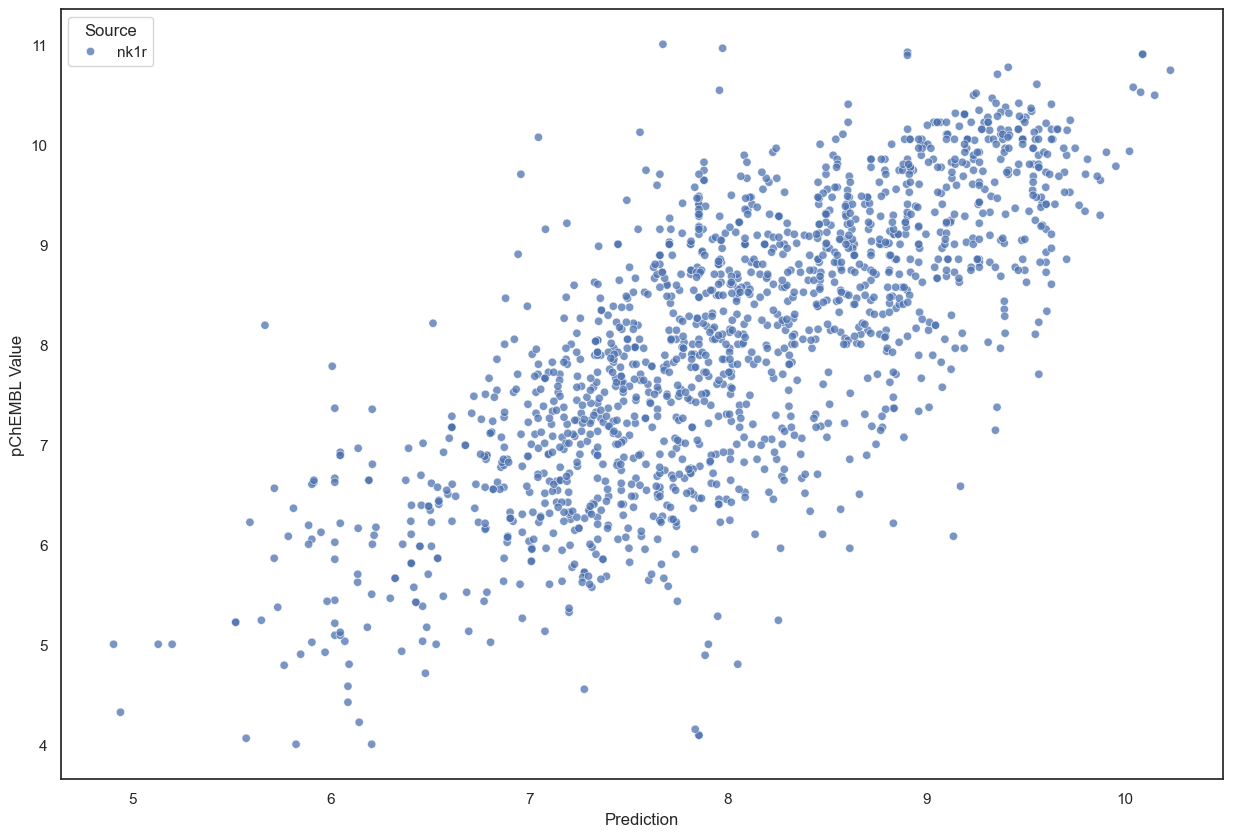

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_svr_p,
                      hue="Source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

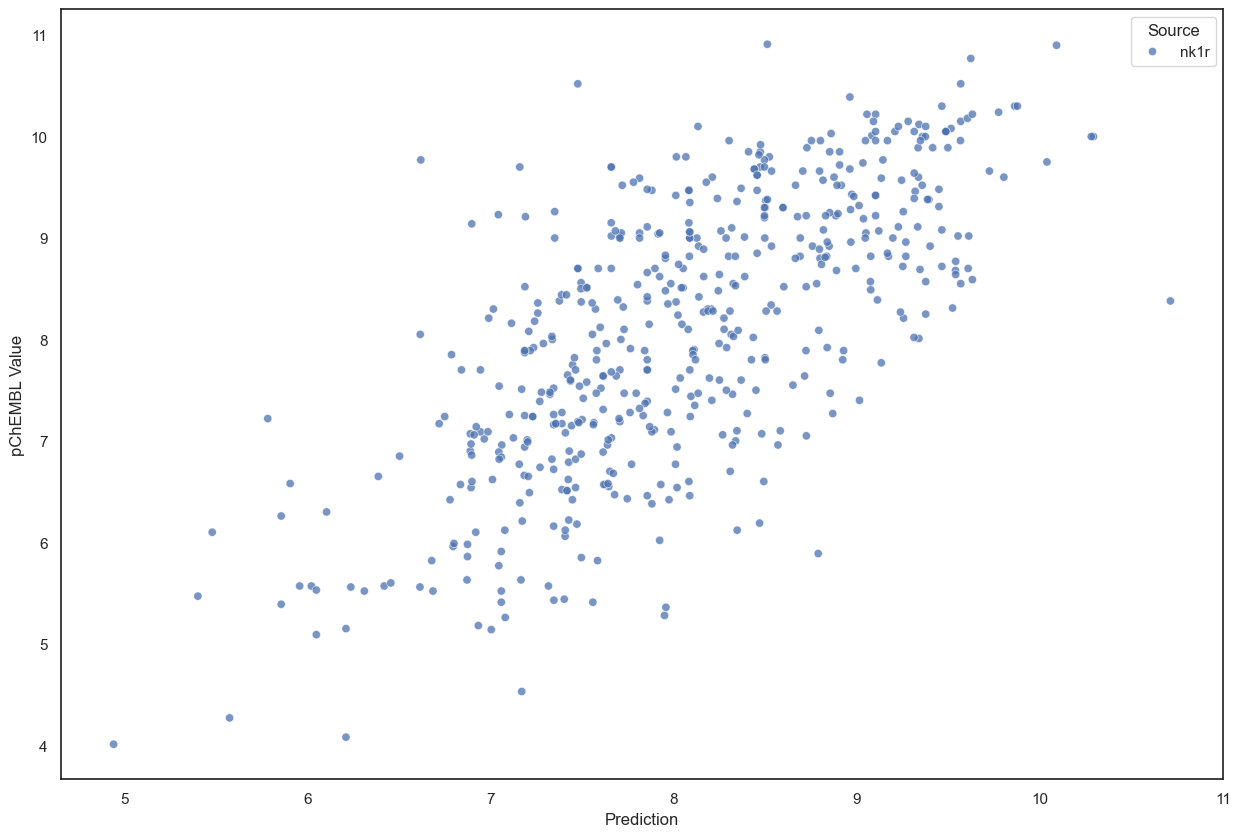

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=ress,
                      hue="Source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [70]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

optuna.logging.set_verbosity(optuna.logging.WARNING)

In [71]:
def mse_(model, data, descriptors, predicted_value):
    res = pd.DataFrame(model.predict(data[descriptors])).join(data[[predicted_value, "source"]].reset_index(level=None,drop=True))
    res.columns = ["Prediction", predicted_value, "Source"]
#     print(f"""Average error whole set: {(res["Prediction"]-res[predicted_value]).abs().mean()}
# Average error nk1r: {(res[res["Source"]=="nk1r"]["Prediction"]-res[res["Source"]=="nk1r"][predicted_value]).abs().mean()}""")
    return (res[res["Source"]=="nk1r"]["Prediction"]-res[res["Source"]=="nk1r"][predicted_value]).abs().mean()

In [72]:
    
def objective_kr(trial):
    """alpha=0.01, kernel='rbf', gamma = 0.0004"""
    alpha = trial.suggest_float("alpha", 0.0001, 0.2, log=True)
    gamma = trial.suggest_float("gamma", 0.000001,0.4, log=True)
    kernel = trial.suggest_categorical("kernel", ["linear", "poly", "rbf"])

    kr = KernelRidge(alpha=alpha, kernel=kernel, gamma = gamma)
    kr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

    return mse_(kr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')
    
def objective_rfr(trial):
    """alpha=0.01, kernel='rbf', gamma = 0.0004"""
    n_estimators = trial.suggest_int("n_estimators", 16, 256)
    max_depth = trial.suggest_int("max_depth", 10, 1000)
    criterion = trial.suggest_categorical("criterion", ["squared_error", "poisson", "friedman_mse"])

    rfr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion)
    rfr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

    return mse_(rfr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')
    
def objective_ada(trial):
    """alpha=0.01, kernel='rbf', gamma = 0.0004"""
    n_estimators = trial.suggest_int("n_estimators", 8, 128)
    learning_rate = trial.suggest_float("learning_rate", 0.01,2, log=True)
    loss = trial.suggest_categorical("loss", ["linear", "exponential"])

    ada = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, loss = loss)
    ada.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

    return mse_(kr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')

model_dir = {'KernelRidge': objective_kr,
            'RandomForestRegressor': objective_rfr,
             'AdaBoostRegressor': objective_ada
            }
bests = {}

study_bpr = optuna.create_study(direction="minimize")
study_bpr.optimize(objective_rfr, n_trials=1)

{'alpha': 0.018325904470276728, 'gamma': 0.0037100008298261147, 'kernel': 'rbf'}


C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\3607650902.py:7: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\3607650902.py:8: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study,params=list(study.best_params.keys()))


{'n_estimators': 147, 'max_depth': 211, 'criterion': 'poisson'}


C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\3607650902.py:7: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\3607650902.py:8: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study,params=list(study.best_params.keys()))


{'n_estimators': 43, 'learning_rate': 0.3840213887480865, 'loss': 'linear'}


C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\3607650902.py:7: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\3607650902.py:8: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study,params=list(study.best_params.keys()))


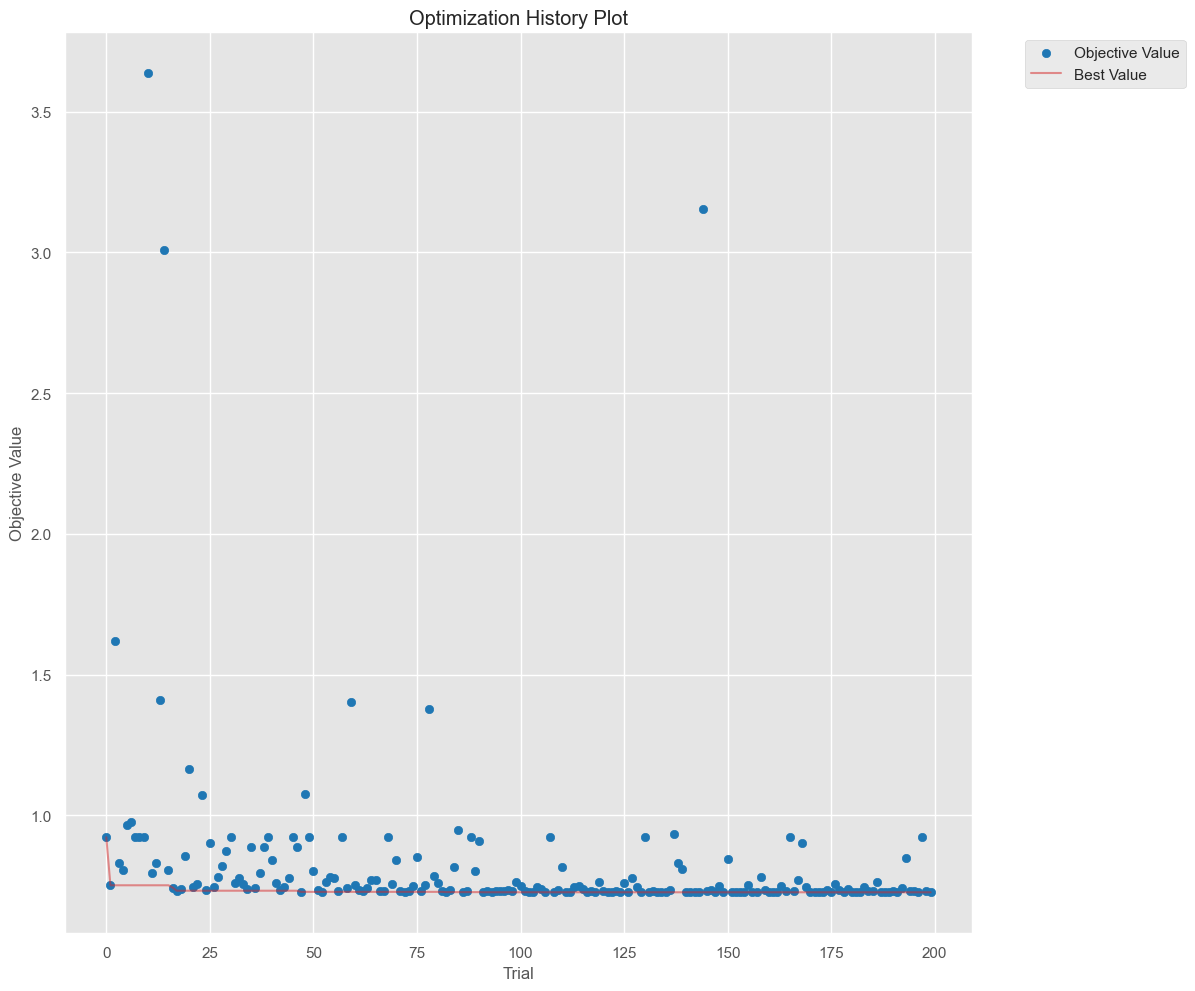

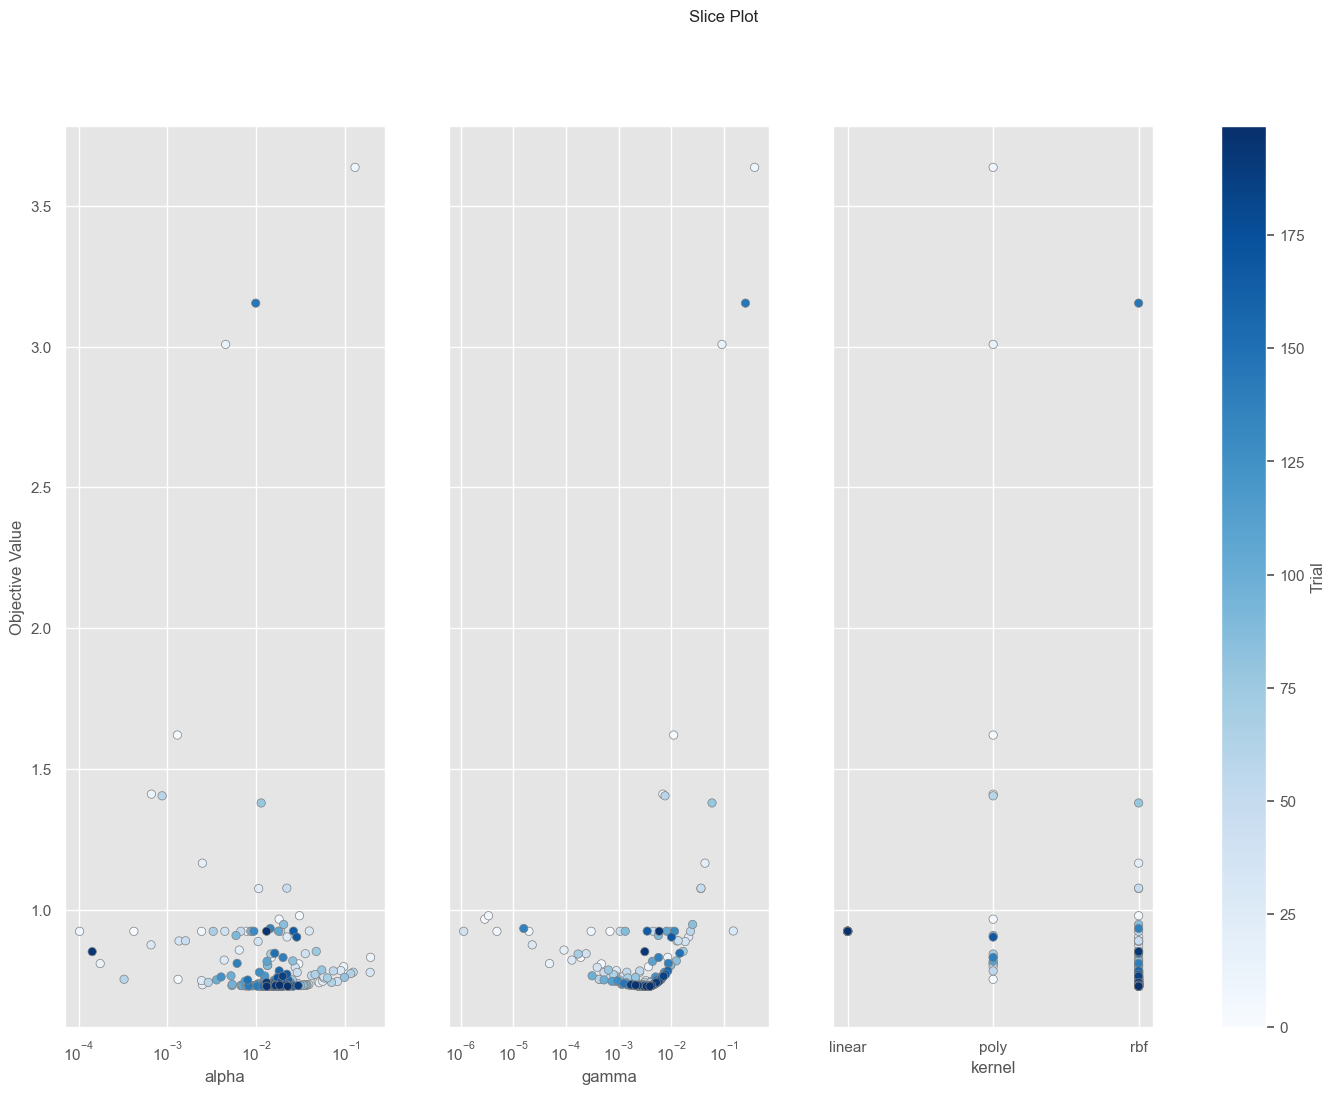

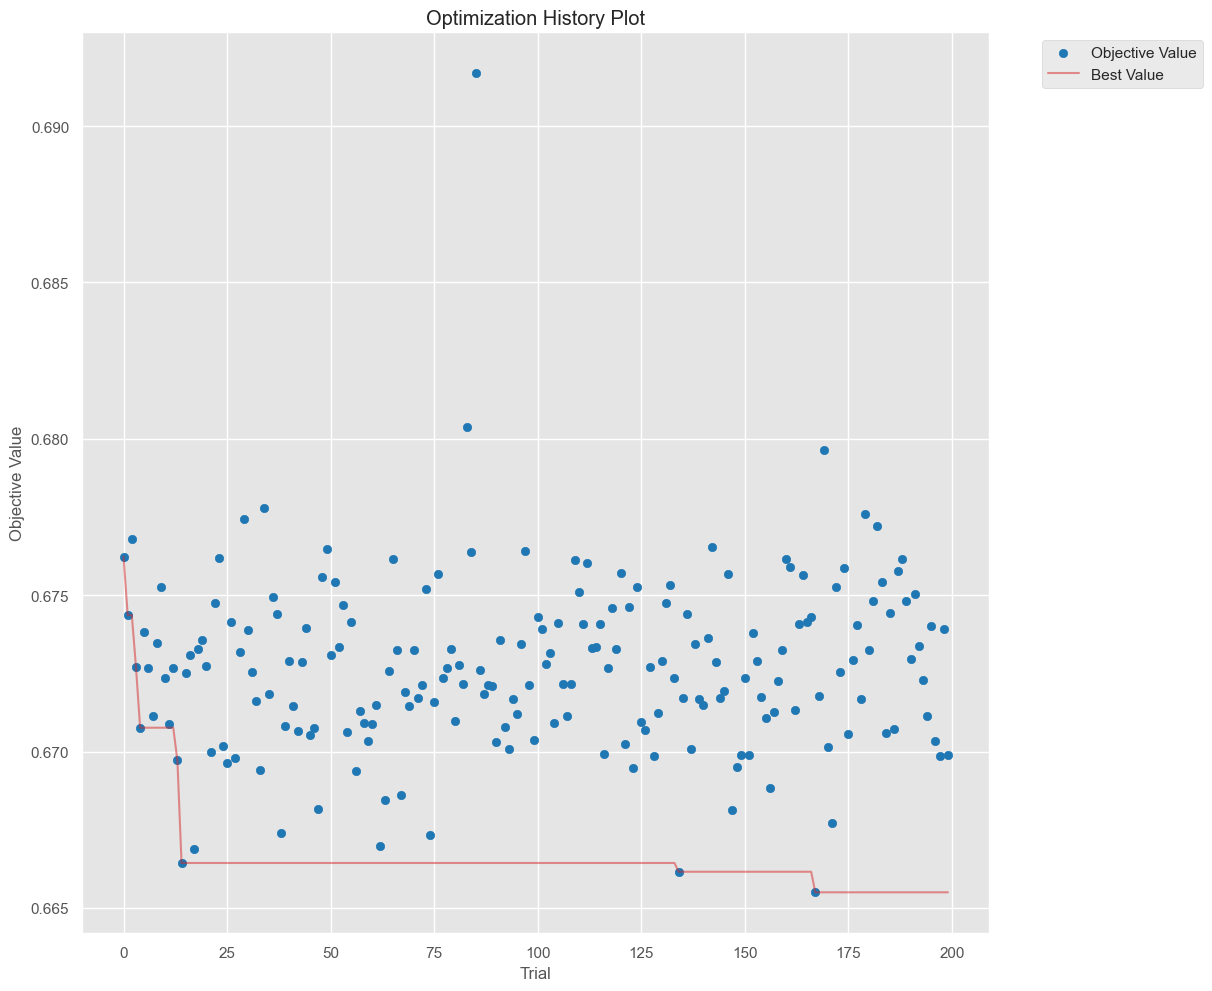

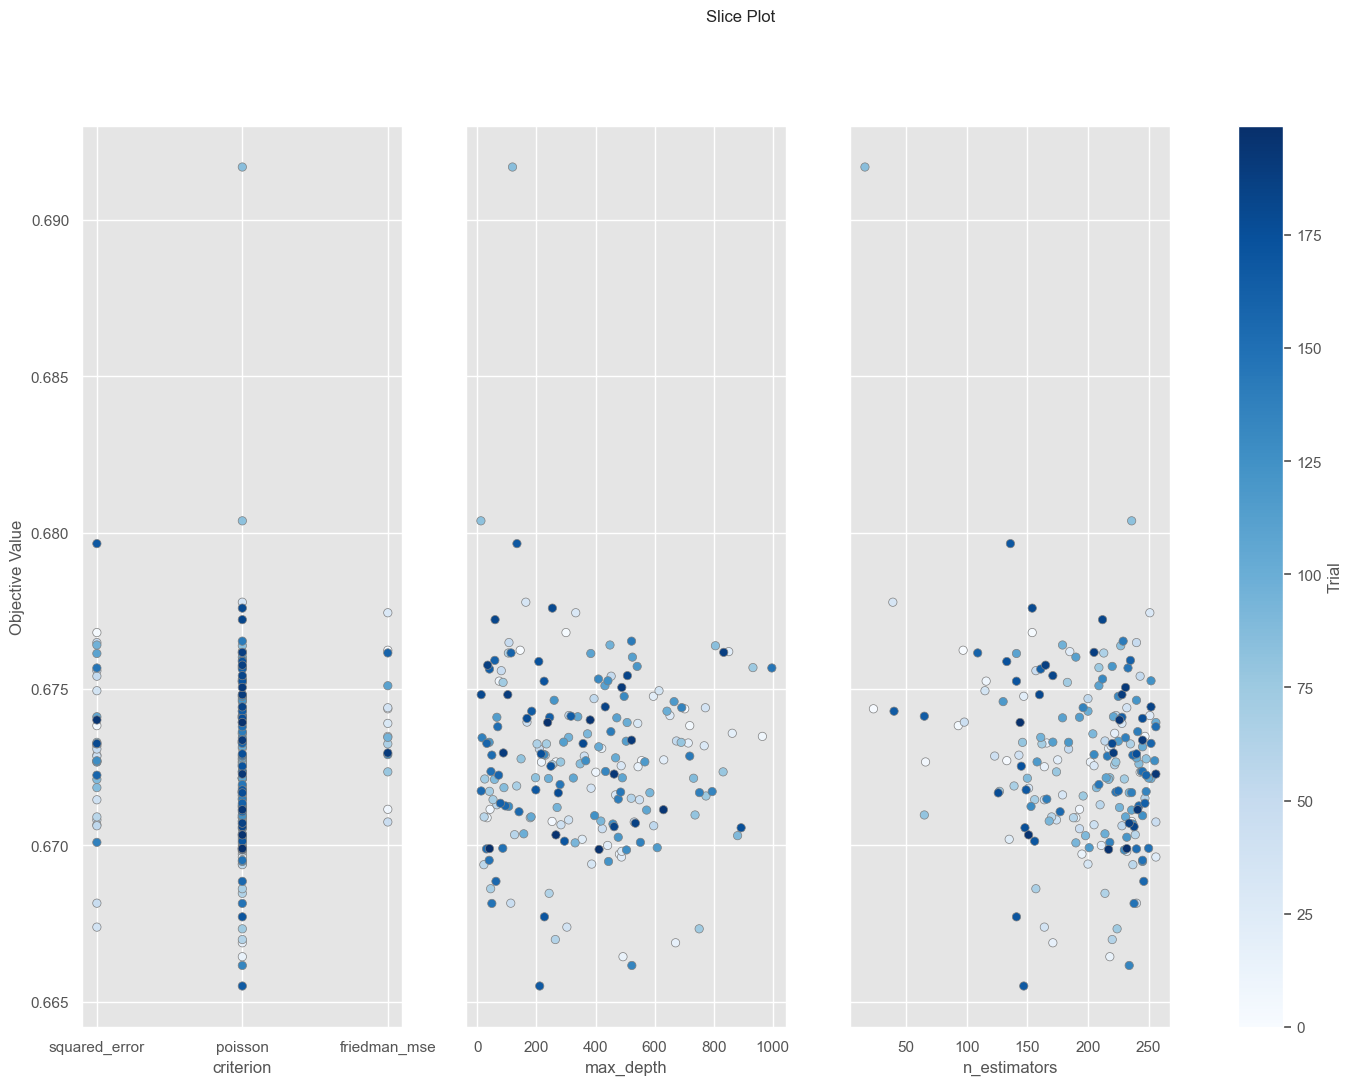

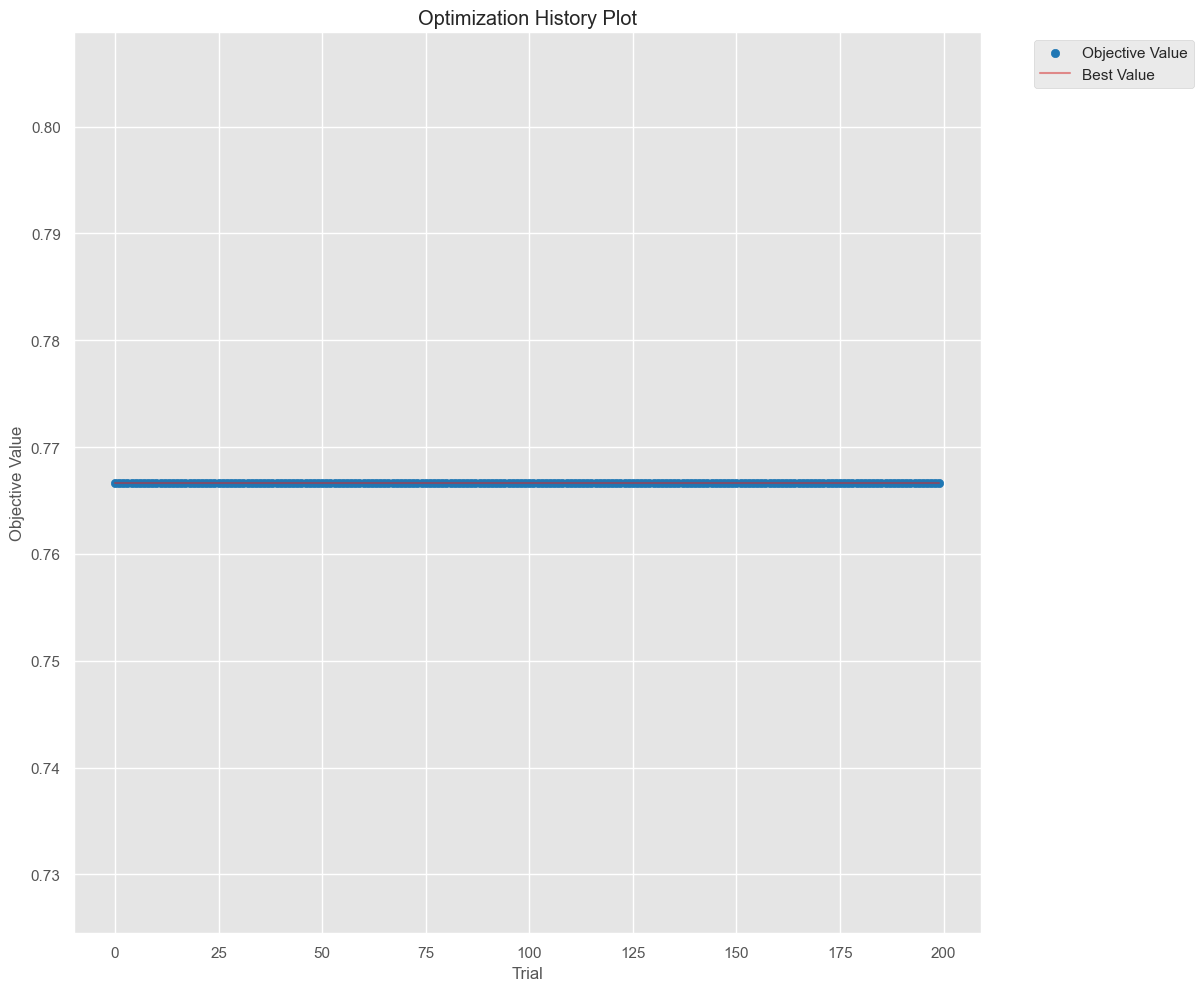

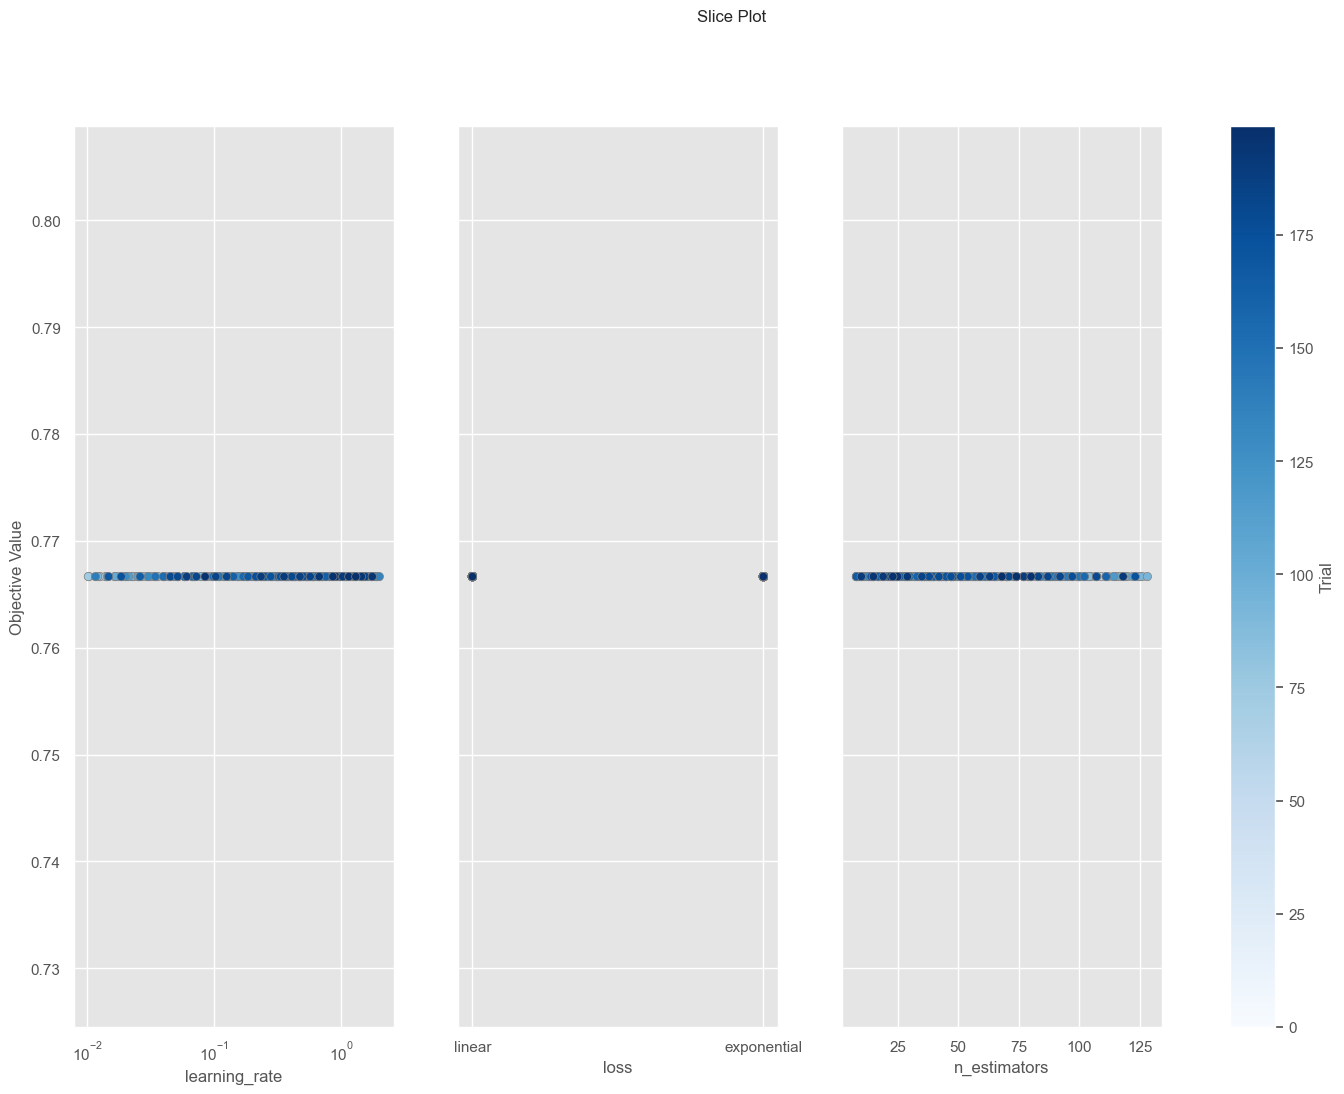

In [73]:
for model, objective in model_dir.items():
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=200)
    bests[model] = study
    print(study.best_params)
    
    optuna.visualization.matplotlib.plot_optimization_history(study)
    optuna.visualization.matplotlib.plot_slice(study,params=list(study.best_params.keys()))

In [74]:
for key, value in bests.items():
    print(key)
    print(value.best_params)

KernelRidge
{'alpha': 0.018325904470276728, 'gamma': 0.0037100008298261147, 'kernel': 'rbf'}
RandomForestRegressor
{'n_estimators': 147, 'max_depth': 211, 'criterion': 'poisson'}
AdaBoostRegressor
{'n_estimators': 43, 'learning_rate': 0.3840213887480865, 'loss': 'linear'}


In [75]:
def objective_rfr_2(trial):
    """alpha=0.01, kernel='rbf', gamma = 0.0004"""
    n_estimators = trial.suggest_int("n_estimators", 180, 512)
    max_depth = trial.suggest_int("max_depth", 10, 10000)
    max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 10, 1000)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 6)

    rfr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, min_samples_split=min_samples_split, criterion = 'poisson', random_state=42)
    rfr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

    return mse_(rfr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')

In [77]:
rfr = RandomForestRegressor(n_estimators=217, max_depth=9127, max_leaf_nodes=955, min_samples_split=5, criterion = 'poisson', random_state=42)
rfr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])


RandomForestRegressor(criterion='poisson', max_depth=9127, max_leaf_nodes=955,
                      min_samples_split=5, n_estimators=217, random_state=42)

In [78]:
res_tr = get_results(rfr, trainset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')
res_ts = get_results(rfr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')

Average error whole set: 0.3885970927949627
Average error nk1r: 0.3885970927949627
Average error whole set: 0.6730751322014934
Average error nk1r: 0.6730751322014934


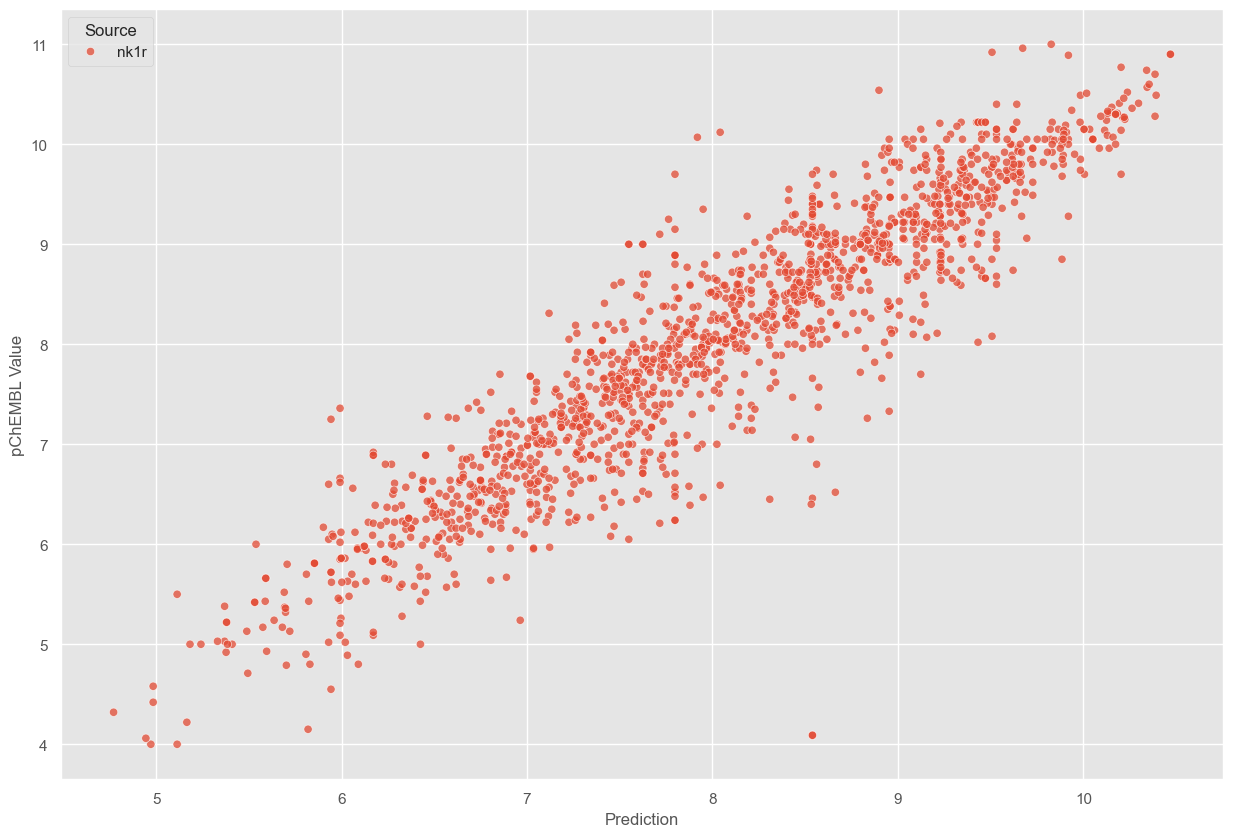

In [79]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_tr,
                      hue="Source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

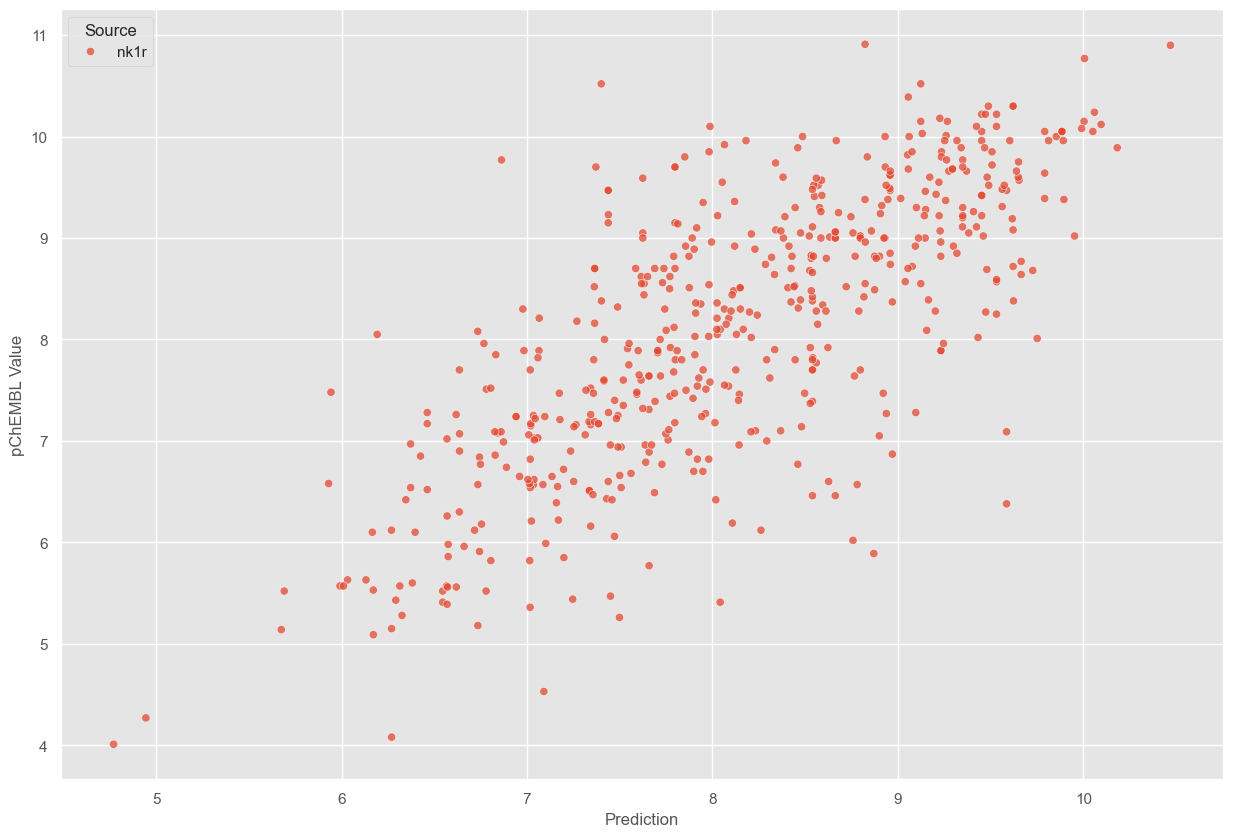

In [80]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_ts,
                      hue="Source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [81]:
print("R^2: %0.2f" % rfr.score(testset[(f"MQN_{x}" for x in range(1, 43))], testset["pChEMBL Value"]))
print("R: %0.2f" % np.sqrt(rfr.score(testset[(f"MQN_{x}" for x in range(1, 43))], testset["pChEMBL Value"])))
print("MSE: %0.2f" %  mean_squared_error(res_ts["Prediction"], res_ts["pChEMBL Value"]))

R^2: 0.57
R: 0.75
MSE: 0.79


In [82]:
pt = (res_ts['Prediction'] > res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean())
pf = (res_ts['Prediction'] > res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] < res_ts['pChEMBL Value'].mean())
nt = (res_ts['Prediction'] < res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] < res_ts['pChEMBL Value'].mean())
nf = (res_ts['Prediction'] < res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean())
conf = pd.concat([pt, pf, nt, nf], axis=1)
conf.columns = ['true positive','false positive','true negatice','false negative']
conf['label'] = conf.idxmax(axis=1)

In [83]:
pt = (res_ts['Prediction'] > res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean())
pf = (res_ts['Prediction'] > res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] < res_ts['pChEMBL Value'].mean())
nt = (res_ts['Prediction'] < res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] < res_ts['pChEMBL Value'].mean())
nf = (res_ts['Prediction'] < res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean())


In [84]:
conf = pd.concat([pt, pf, nt, nf], axis=1)
conf.columns = ['true positive','false positive','true negatice','false negative']

In [85]:
conf['label'] = conf.idxmax(axis=1)

In [86]:
conf

true positive  false positive  true negatice  false negative  \
0            False           False           True           False   
1             True           False          False           False   
2             True           False          False           False   
3             True           False          False           False   
4            False           False           True           False   
..             ...             ...            ...             ...   
527          False           False          False            True   
528          False           False           True           False   
529          False           False           True           False   
530          False           False           True           False   
531          False           False           True           False   

              label  
0     true negatice  
1     true positive  
2     true positive  
3     true positive  
4     true negatice  
..              ...  
527  false negative  
528   true negatice  
529   true negatice  
530   true negatice  
531   true negatice  

[532 rows x 5 columns]

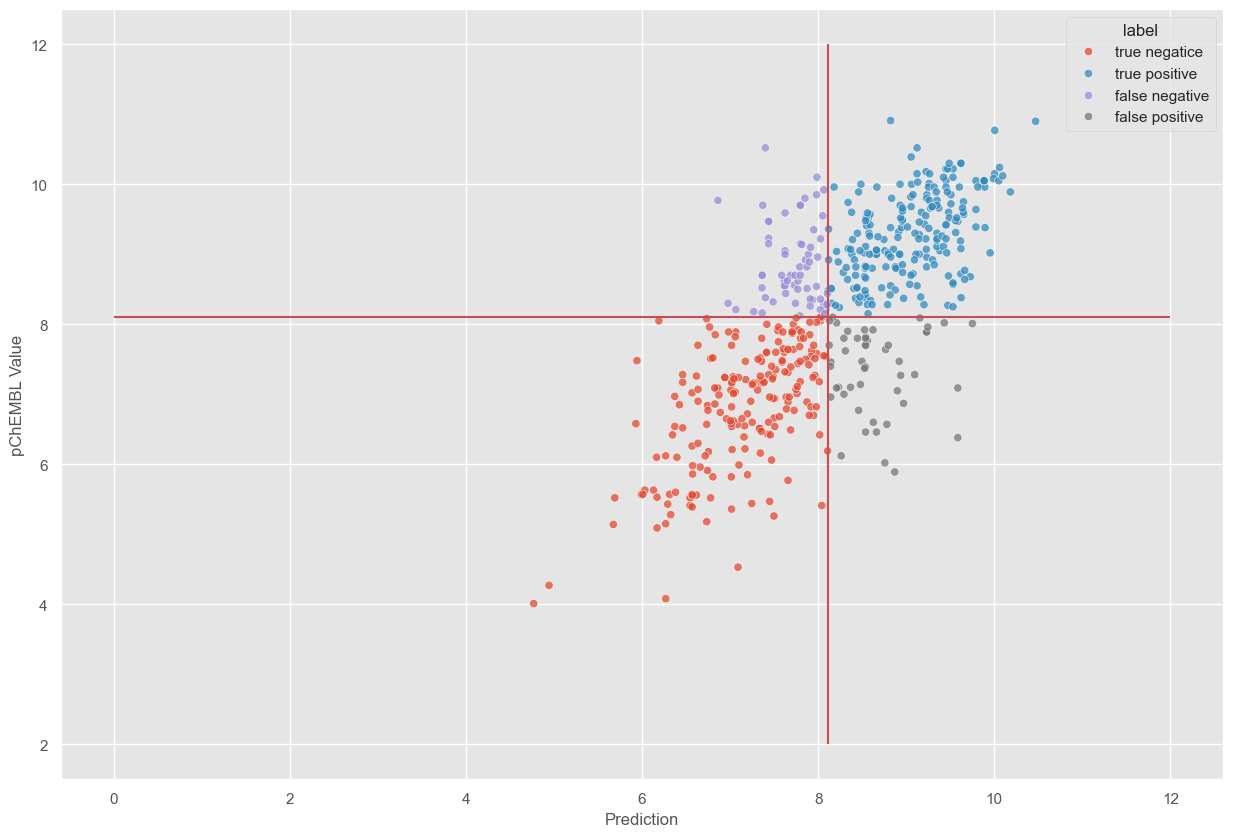

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_ts,
                      hue=conf.label,
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )
plt.hlines(res_ts['pChEMBL Value'].mean(), xmin=0, xmax=12,color='r')
plt.vlines(res_ts['pChEMBL Value'].mean(), ymin=2, ymax=12,color='r')

In [88]:
pt = (res_ts['Prediction'] > res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean())
pf = (res_ts['Prediction'] > res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] < res_ts['pChEMBL Value'].mean())
nt = (res_ts['Prediction'] < res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] < res_ts['pChEMBL Value'].mean())
nf = (res_ts['Prediction'] < res_ts['pChEMBL Value'].mean()) & (res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean())
# conf = pd.concat([pt, pf, nt, nf], axis=1)
# conf.columns = ['true positive','false positive','true negatice','false negative']
# conf['label'] = conf.idxmax(axis=1)

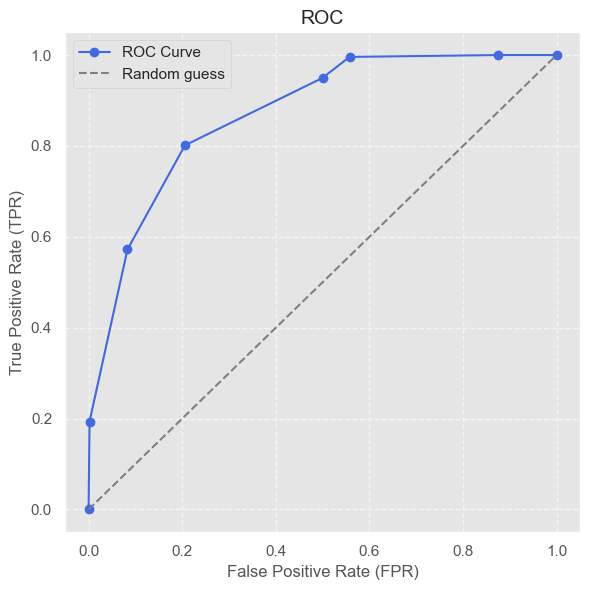

In [89]:
xs = [1]
ys = [1]
for param in [5,6,7,8,9,10]:
    pt = (res_ts['Prediction'] > param) & (res_ts['pChEMBL Value'] > param)
    pf = (res_ts['Prediction'] > param) & (res_ts['pChEMBL Value'] < param)
    nt = (res_ts['Prediction'] < param) & (res_ts['pChEMBL Value'] < param)
    nf = (res_ts['Prediction'] < param) & (res_ts['pChEMBL Value'] > param)

    ys.append(pt.sum()/(pt.sum()+nf.sum()))
    xs.append(pf.sum()/(nt.sum()+pf.sum()))

ys.append(0)
xs.append(0)

plt.figure(figsize=(6, 6))
plt.plot(sorted(xs), sorted(ys), marker='o', linestyle='-', color='royalblue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

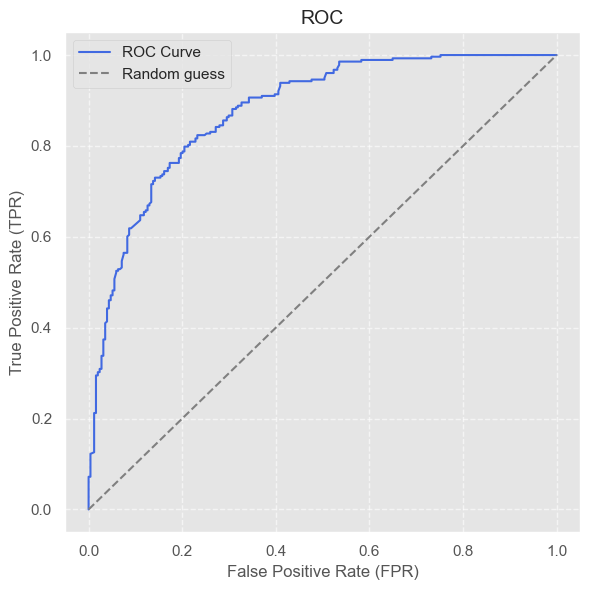

In [90]:
from sklearn.metrics import roc_curve

y_true = res_ts['pChEMBL Value'] > res_ts['pChEMBL Value'].mean()
y_scores = res_ts['Prediction']

fpr, tpr, _ = roc_curve(y_true, y_scores)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-', color='royalblue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [92]:
import xgboost as xgb

In [97]:
data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
label = np.random.randint(2, size=5)  # binary target
dtrain = xgb.DMatrix(data, label=label)

In [98]:
gbr = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [99]:
gbr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

In [100]:
res_gbr = get_results(gbr, trainset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')
res_gbr = get_results(gbr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')

Average error whole set: 0.2447793212050626
Average error nk1r: 0.2447793212050626
Average error whole set: 0.7024023369021882
Average error nk1r: 0.7024023369021882


In [105]:
def objective_xgb_2(trial):
    """
    Optuna objective function for XGBRegressor with realistic, commonly used hyperparameter ranges.
    """
    n_estimators = trial.suggest_int("n_estimators", 200, 1000)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    subsample = trial.suggest_float("subsample", 0.6, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 1.0)
    gamma = trial.suggest_float("gamma", 0, 5)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    reg_alpha = trial.suggest_float("reg_alpha", 0, 1.0)
    reg_lambda = trial.suggest_float("reg_lambda", 1.0, 10.0)

    gbr = xgb.XGBRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective="reg:squarederror",
        random_state=42,
        verbosity=0,
        tree_method="hist"  # good for speed on large datasets
    )

    features = [f"MQN_{x}" for x in range(1, 43)]
    X_train = trainset[trainset["pChEMBL Value"] > 0][features]
    y_train = trainset[trainset["pChEMBL Value"] > 0]["pChEMBL Value"]

    gbr.fit(X_train, y_train)

    return mse_(gbr, testset, features, 'pChEMBL Value')

{'n_estimators': 408, 'max_depth': 8, 'learning_rate': 0.023102019094702803, 'subsample': 0.6892183948246638, 'colsample_bytree': 0.6142529473269424, 'gamma': 0.00905516876189738, 'min_child_weight': 3, 'reg_alpha': 0.7902589576968888, 'reg_lambda': 9.087556573390463}


C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\280013632.py:5: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)
C:\Users\gkarg\AppData\Local\Temp\ipykernel_488\280013632.py:6: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_slice(study,params=list(study.best_params.keys()))


array([<Axes: xlabel='colsample_bytree', ylabel='Objective Value'>,
       <Axes: xlabel='gamma'>, <Axes: xlabel='learning_rate'>,
       <Axes: xlabel='max_depth'>, <Axes: xlabel='min_child_weight'>,
       <Axes: xlabel='n_estimators'>, <Axes: xlabel='reg_alpha'>,
       <Axes: xlabel='reg_lambda'>, <Axes: xlabel='subsample'>],
      dtype=object)

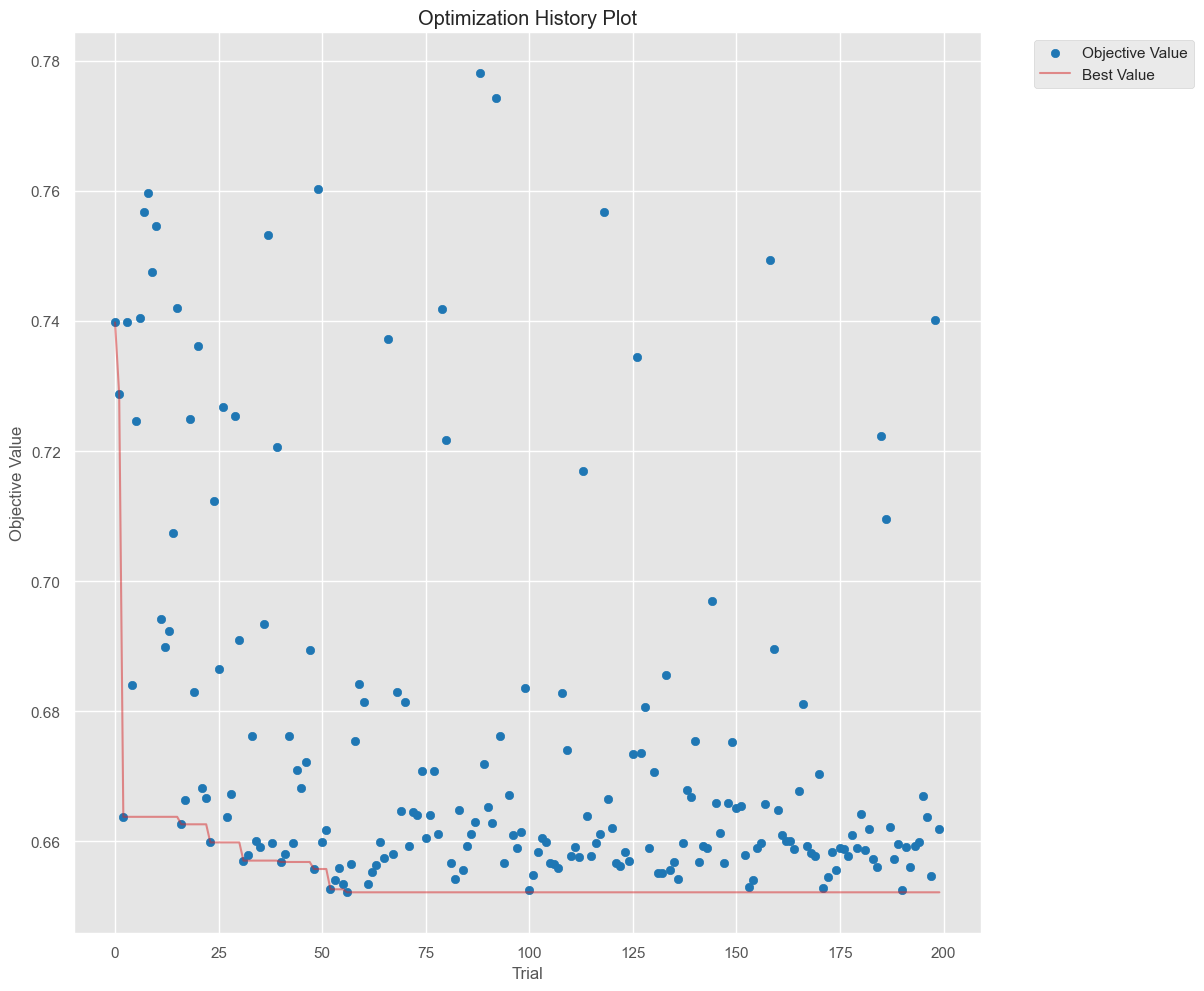

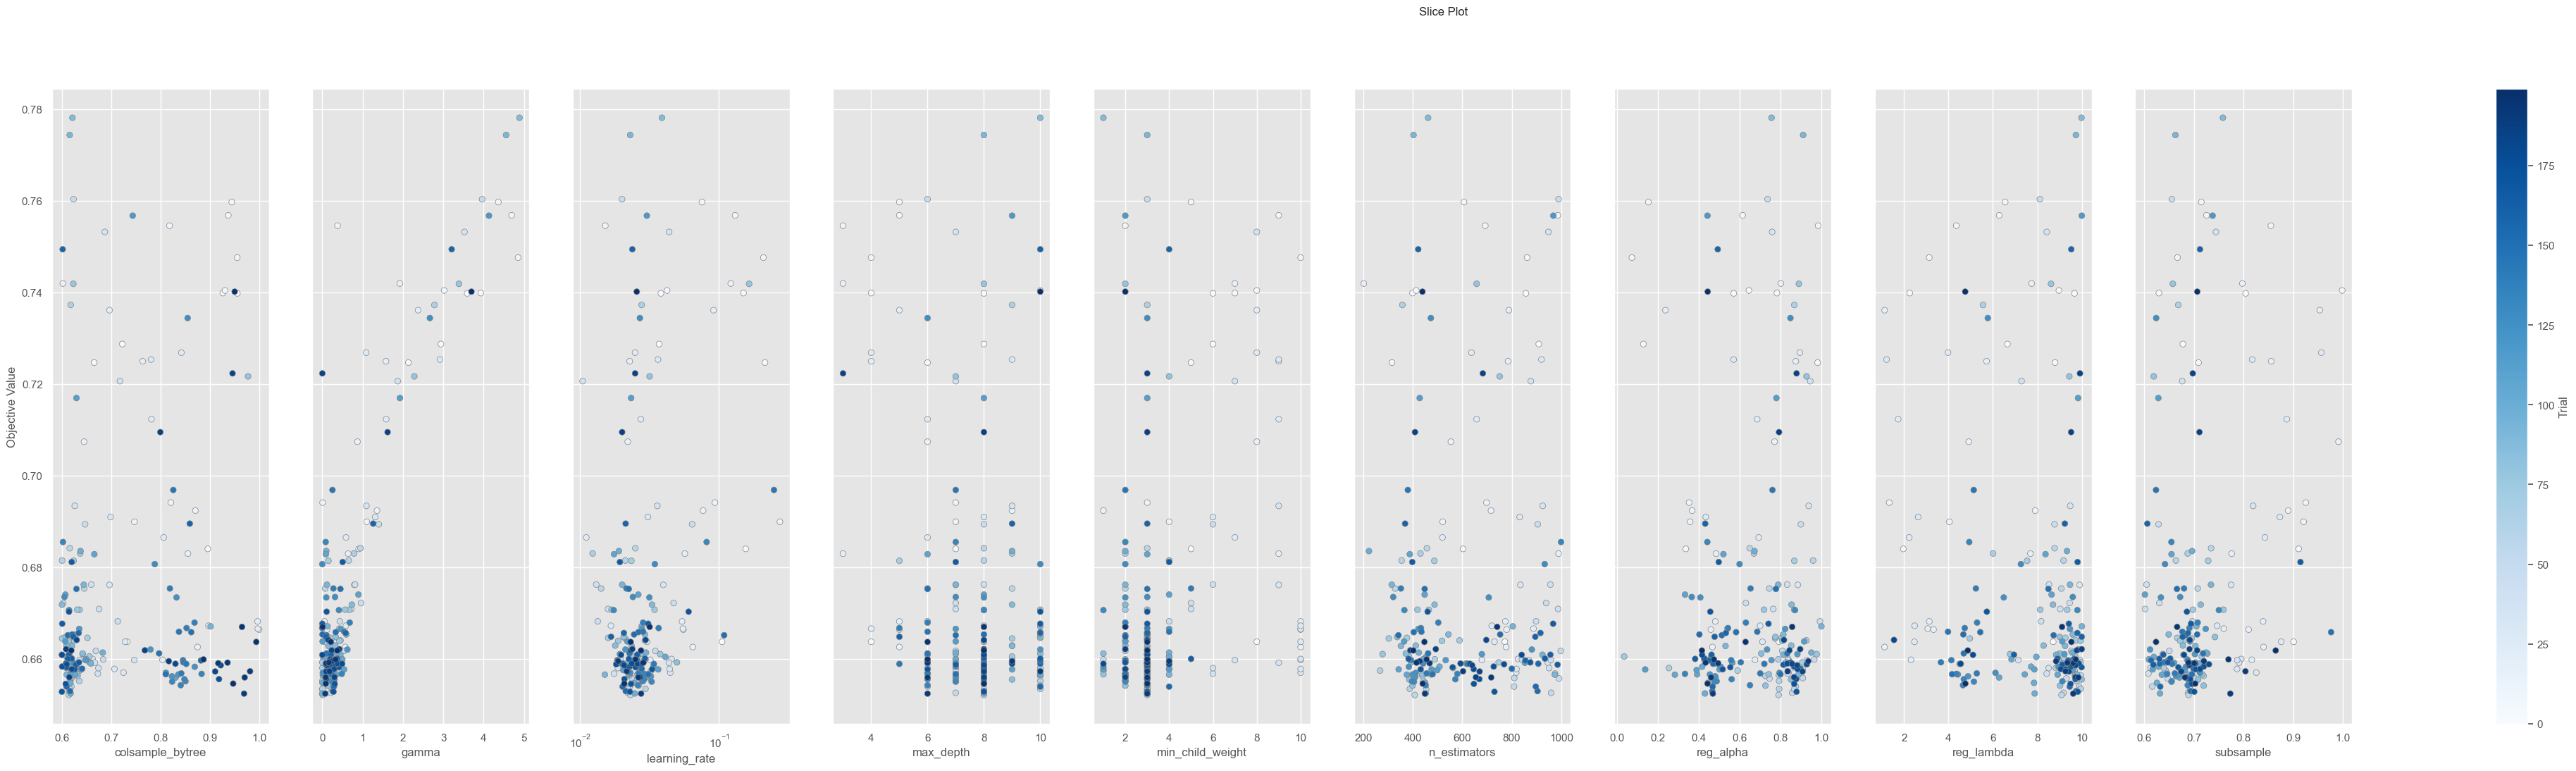

In [106]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_xgb_2, n_trials=200)
print(study.best_params)

optuna.visualization.matplotlib.plot_optimization_history(study)
optuna.visualization.matplotlib.plot_slice(study,params=list(study.best_params.keys()))

In [107]:
gbr = xgb.XGBRegressor(**study.best_params)
gbr.fit(trainset[trainset["pChEMBL Value"]>0][(f"MQN_{x}" for x in range(1, 43))], trainset[trainset["pChEMBL Value"]>0]["pChEMBL Value"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6142529473269424, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0.00905516876189738, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.023102019094702803,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=408, n_jobs=None,
             num_parallel_tree=None, ...)

In [109]:
res_gbr = get_results(gbr, trainset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')
res_gbr_test = get_results(gbr, testset, (f"MQN_{x}" for x in range(1, 43)), 'pChEMBL Value')

Average error whole set: 0.43738521627380683
Average error nk1r: 0.43738521627380683
Average error whole set: 0.6541412761516141
Average error nk1r: 0.6541412761516141


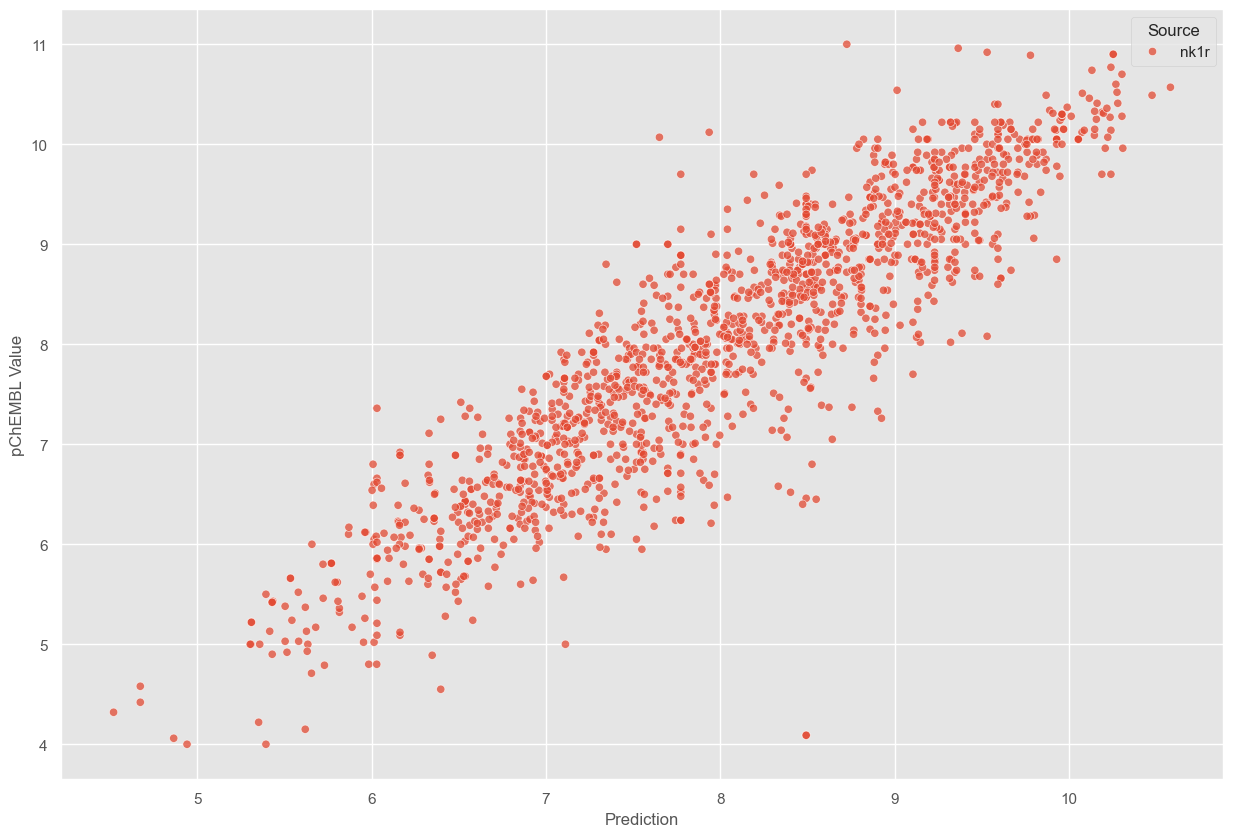

In [110]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_gbr,
                      hue="Source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

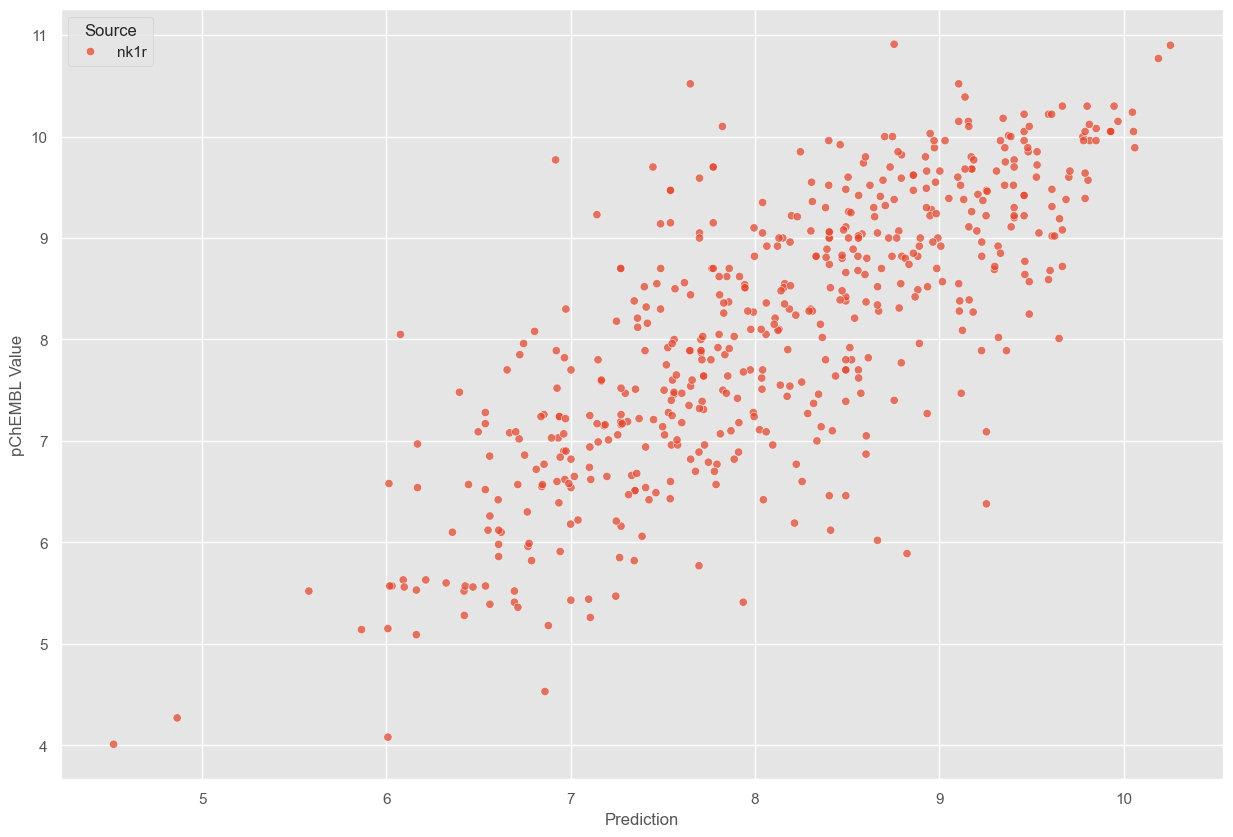

In [111]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_gbr_test,
                      hue="Source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

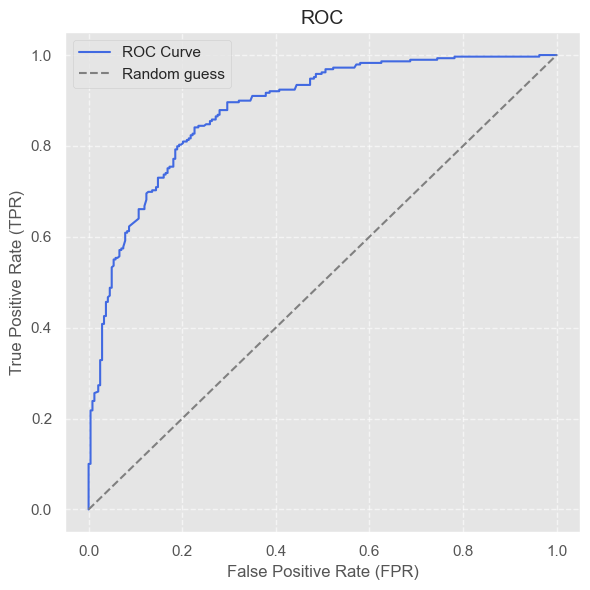

In [119]:
from sklearn.metrics import roc_curve

y_true = res_gbr_test['pChEMBL Value'] > res_gbr['pChEMBL Value'].mean()
y_scores = res_gbr_test['Prediction']

fpr, tpr, _ = roc_curve(y_true, y_scores)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='-', color='royalblue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [117]:
pt = (res_gbr_test['Prediction'] > res_gbr['pChEMBL Value'].mean()) & (res_gbr_test['pChEMBL Value'] > res_gbr['pChEMBL Value'].mean())
pf = (res_gbr_test['Prediction'] > res_gbr['pChEMBL Value'].mean()) & (res_gbr_test['pChEMBL Value'] < res_gbr['pChEMBL Value'].mean())
nt = (res_gbr_test['Prediction'] < res_gbr['pChEMBL Value'].mean()) & (res_gbr_test['pChEMBL Value'] < res_gbr['pChEMBL Value'].mean())
nf = (res_gbr_test['Prediction'] < res_gbr['pChEMBL Value'].mean()) & (res_gbr_test['pChEMBL Value'] > res_gbr['pChEMBL Value'].mean())
conf = pd.concat([pt, pf, nt, nf], axis=1)
conf.columns = ['true positive','false positive','true negatice','false negative']
conf['label'] = conf.idxmax(axis=1)

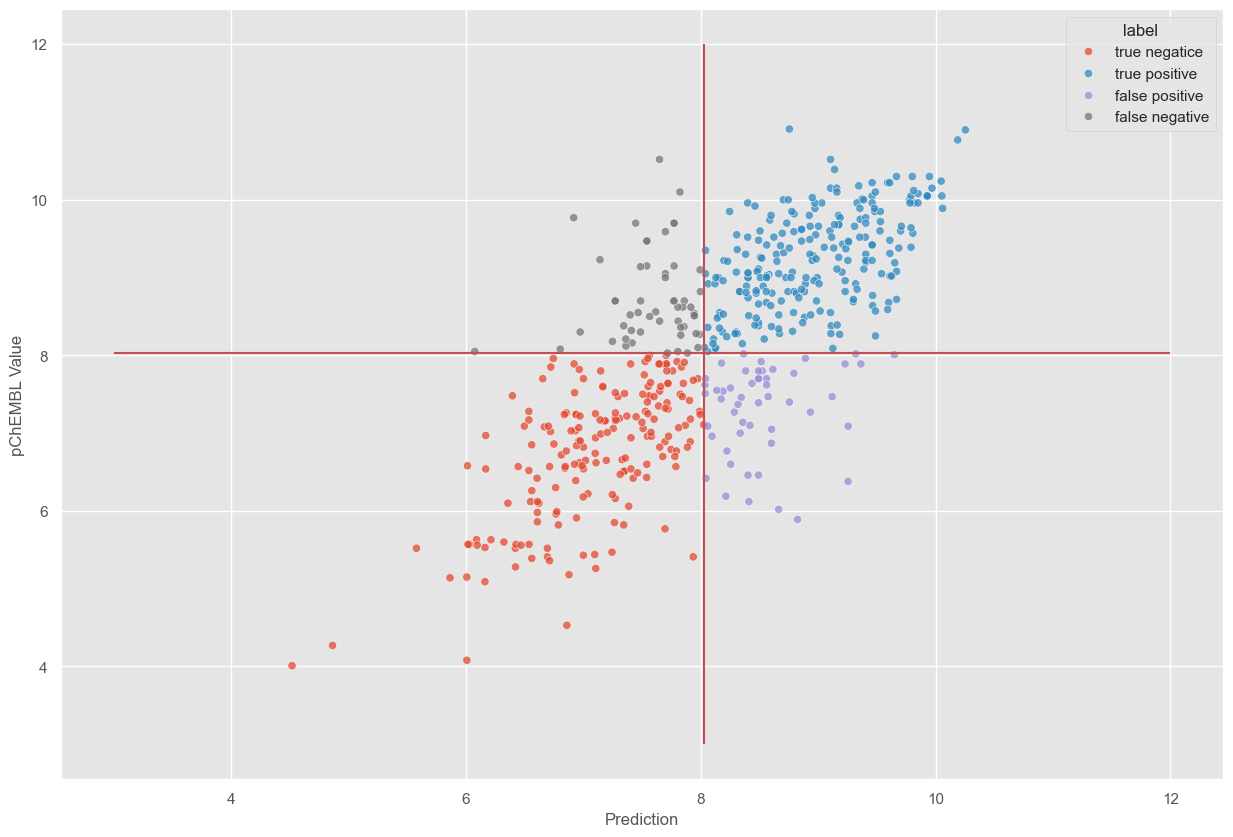

In [122]:
fig, ax = plt.subplots(figsize=(15,10))
p=sns.scatterplot(x="Prediction",
                      y="pChEMBL Value",
                      data=res_gbr_test,
                      hue=conf.label,
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )
plt.hlines(res_gbr['pChEMBL Value'].mean(), xmin=3, xmax=12,color='r')
plt.vlines(res_gbr['pChEMBL Value'].mean(), ymin=3, ymax=12,color='r')